## Introduction
Greetings from the Kaggle bot! This is an automatically-generated kernel with starter code demonstrating how to read in the data and begin exploring. If you're inspired to dig deeper, click the blue "Fork Notebook" button at the top of this kernel to begin editing.

## Exploratory Analysis
To begin this exploratory analysis, first import libraries and define functions for plotting the data using `matplotlib`. Depending on the data, not all plots will be made. (Hey, I'm just a simple kerneling bot, not a Kaggle Competitions Grandmaster!)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns


In [2]:
df1 = pd.read_csv('archive/car_noise_specification_datasets.csv', delimiter='	')
df1.dataframeName = 'car_noise_specification_datasets.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1895 rows and 72 columns


Let's take a quick look at what the data looks like:

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895 entries, 0 to 1894
Data columns (total 72 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       1895 non-null   int64  
 1   brand                            1894 non-null   object 
 2   model                            1894 non-null   object 
 3   spec                             1894 non-null   object 
 4   year                             1894 non-null   float64
 5   dB_at_idle                       1894 non-null   float64
 6   dB_at_50kmh                      1894 non-null   float64
 7   dB_at_80kmh                      1894 non-null   float64
 8   dB_at_100kmh                     1894 non-null   float64
 9   dB_at_120kmh                     1894 non-null   float64
 10  dB_at_140kmh                     1894 non-null   float64
 11  model_id                         1067 non-null   float64
 12  model_id_cqa        

In [3]:
##Cleanind engine position

df1['model_engine_position_cqa_cleaned'] = df1.model_engine_position_cqa.copy()
for a in np.arange(len(df1.model_engine_position_cqa)):
    if df1.model_engine_position_cqa.iloc[a] == 'Front ':
        df1.model_engine_position_cqa_cleaned.iloc[a] = 'Front'
        
df1.model_engine_position_cqa_cleaned.unique()

C:\Users\User\AppData\Local\Temp\ipykernel_11304\2312444225.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.model_engine_position_cqa_cleaned.iloc[a] = 'Front'


array([nan, 'Front', 'Middle', 'Rear'], dtype=object)

In [5]:
df1.model_engine_position_cqa_cleaned.value_counts()

Front     1047
Rear        13
Middle       7
Name: model_engine_position_cqa_cleaned, dtype: int64

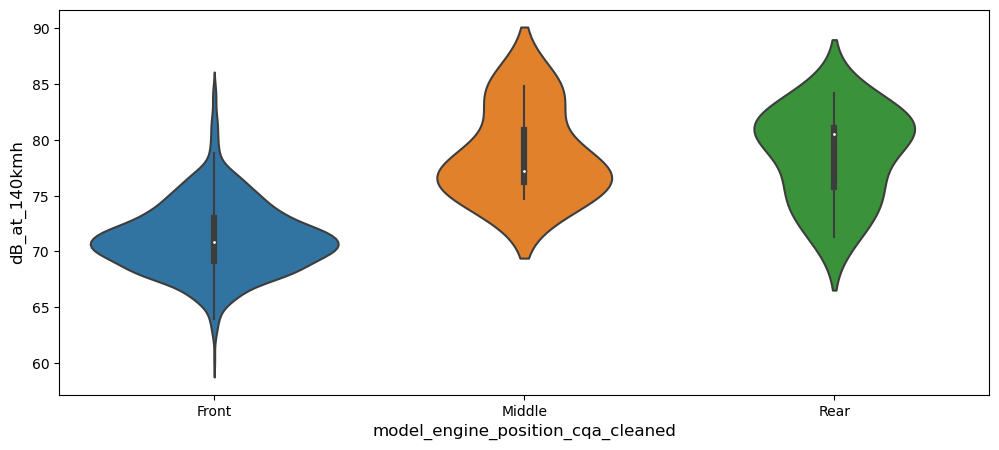

In [98]:
##Categorical Data Engine Position
a = 'dB_at_140kmh'
b = 'model_engine_position_cqa_cleaned'
comp = df1[[a,b]].copy().dropna()

plt.figure(figsize=(12,5))

sns.violinplot(data = comp,
               y = a,
               x = b)

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel(a, fontsize=12)
plt.xlabel(b, fontsize=12)

plt.show()

In [7]:
df1.model_seats_cqa.value_counts()

5.0    623
4.0    118
2.0     32
7.0     22
8.0      6
6.0      6
9.0      1
3.0      1
Name: model_seats_cqa, dtype: int64

In [4]:
##Cleaning Engine Type

df1['model_engine_type_cqa_cleaned'] = df1.model_engine_type_cqa.copy()

for a in np.arange(len(df1.model_engine_type_cqa)):
    if df1.model_engine_type_cqa.iloc[a] == 'Inline':
        df1.model_engine_type_cqa_cleaned.iloc[a] = 'in-line'
        
df1.model_engine_type_cqa_cleaned.value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_11304\449965749.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.model_engine_type_cqa_cleaned.iloc[a] = 'in-line'


in-line          734
V                270
boxer             24
Flat              11
Not Available      7
electric           5
W                  4
single             1
Name: model_engine_type_cqa_cleaned, dtype: int64

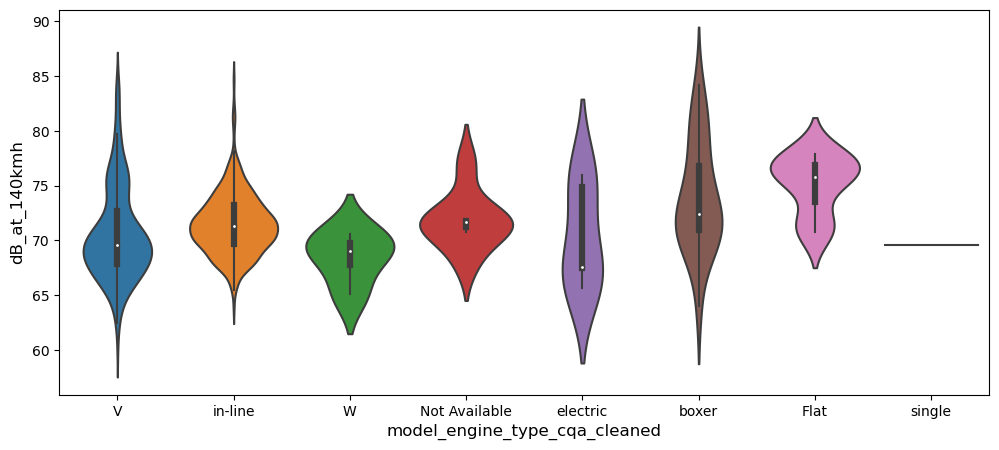

In [101]:
##Categorical Data Engine type
a = 'dB_at_140kmh'
b = 'model_engine_type_cqa_cleaned'
comp = df1[[a,b]].copy().dropna()

plt.figure(figsize=(12,5))

sns.violinplot(data = comp,
               y = a,
               x = b)

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel(a, fontsize=12)
plt.xlabel(b, fontsize=12)

plt.show()

In [5]:
##Cleaning Drive Type

df1['model_drive_cqa_cleaned'] = df1.model_drive_cqa.copy()

for a in np.arange(len(df1.model_drive_cqa)):
    if (df1.model_drive_cqa.iloc[a] == 'Front Wheel Driv')|(df1.model_drive_cqa.iloc[a] == 'front'):
        df1.model_drive_cqa_cleaned.iloc[a] = 'Front'
    if (df1.model_drive_cqa.iloc[a] == 'AWD')|(df1.model_drive_cqa.iloc[a] == '4WD')|(df1.model_drive_cqa.iloc[a] == 'AWD ')|(df1.model_drive_cqa.iloc[a] == 'Four Wheel Drive'):
        df1.model_drive_cqa_cleaned.iloc[a] = 'All Wheel Drive'
    if df1.model_drive_cqa.iloc[a] == 'Rear Wheel Drive':
        df1.model_drive_cqa_cleaned.iloc[a] = 'Rear'
df1.model_drive_cqa_cleaned.value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_11304\1304845229.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.model_drive_cqa_cleaned.iloc[a] = 'All Wheel Drive'
C:\Users\User\AppData\Local\Temp\ipykernel_11304\1304845229.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.model_drive_cqa_cleaned.iloc[a] = 'Front'
C:\Users\User\AppData\Local\Temp\ipykernel_11304\1304845229.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

Front              655
All Wheel Drive    279
Rear               128
Not Available        5
Name: model_drive_cqa_cleaned, dtype: int64

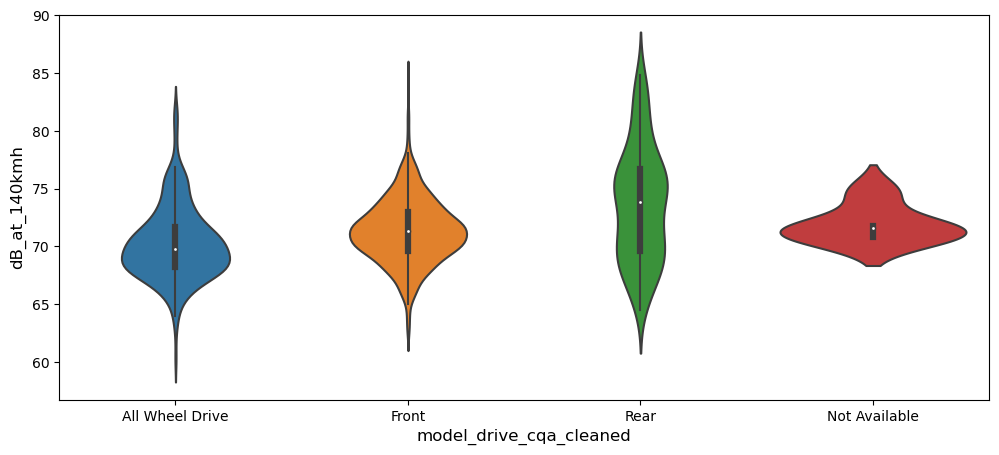

In [106]:
##Categorical Data Drive Type
a = 'dB_at_140kmh'
b = 'model_drive_cqa_cleaned'
comp = df1[[a,b]].copy().dropna()

plt.figure(figsize=(12,5))

sns.violinplot(data = comp,
               y = a,
               x = b)

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel(a, fontsize=12)
plt.xlabel(b, fontsize=12)

plt.show()

In [6]:
##Cleaning Body Type

df1['model_body_cqa_cleaned'] = df1.model_body_cqa.copy()

for a in np.arange(len(df1.model_body_cqa)):
    if df1.model_body_cqa.iloc[a] == 'Sport Utility Vehicles':
        df1.model_body_cqa_cleaned.iloc[a] = 'SUV'

df1.model_body_cqa_cleaned.value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_11304\696211440.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.model_body_cqa_cleaned.iloc[a] = 'SUV'


Hatchback                       225
Sedan                           222
SUV                             201
Coupe                            70
Compact Cars                     58
Minivan                          42
Midsize Cars                     38
Station Wagon                    31
Convertible                      21
Crossover                        21
Subcompact Cars                  18
Two Seaters                      16
Mini Compact Cars                14
Pickup                           11
Small Station Wagons              6
Large Cars                        5
Panel Van                         4
Roadster                          3
Standard Pickup Trucks            2
Small Sport Utility Vehicles      1
Name: model_body_cqa_cleaned, dtype: int64

In [7]:
##Cleaning Fuel type
df1.model_engine_fuel_cqa.value_counts()

df1['model_engine_fuel_cqa_cleaned'] = df1.model_engine_fuel_cqa.copy()

gas = ['Gasoline - Premium','Premium Unleaded (Recommended)','Regular Unleaded', 'Premium Unleaded (Required)']

for x in np.arange(len(df1.model_engine_fuel_cqa)):
    if df1['model_engine_fuel_cqa_cleaned'].iloc[x] in gas:
        df1['model_engine_fuel_cqa_cleaned'].iloc[x] = 'Gasoline'

df1.model_engine_fuel_cqa_cleaned.value_counts()

C:\Users\User\AppData\Local\Temp\ipykernel_11304\1839739371.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['model_engine_fuel_cqa_cleaned'].iloc[x] = 'Gasoline'


Gasoline                      809
Diesel                        162
Gasoline / Electric Hybrid     29
Flex-Fuel (Unleaded/E85)       15
Flex Fuel                      11
Electric                       10
Diesel / Electric Hybrid        3
Not Available                   3
Name: model_engine_fuel_cqa_cleaned, dtype: int64

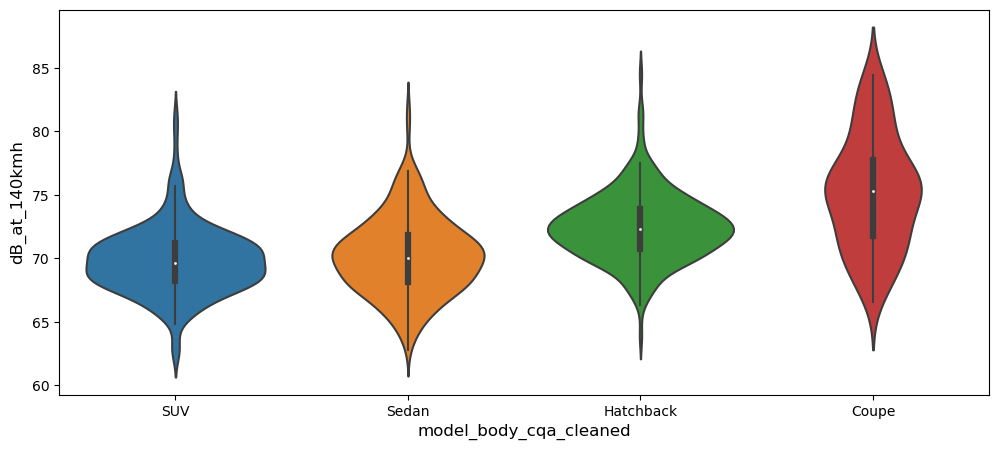

In [109]:
##Categorical Data Body Type
a = 'dB_at_140kmh'
b = 'model_body_cqa_cleaned'
comp = df1[[a,b]].copy().dropna()

comp = comp.loc[(comp.model_body_cqa_cleaned == 'Hatchback')|(comp.model_body_cqa_cleaned == 'Sedan')|(comp.model_body_cqa_cleaned == 'SUV')|(comp.model_body_cqa_cleaned == 'Coupe')]

plt.figure(figsize=(12,5))

sns.violinplot(data = comp,
               y = a,
               x = b)

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

plt.ylabel(a, fontsize=12)
plt.xlabel(b, fontsize=12)

plt.show()

In [8]:
## Adding Change in db

df1['Change_idle_to_50kmh'] = 10*np.log10(10**(df1.dB_at_50kmh/10) - 10**(df1.dB_at_idle/10))
df1['Change_idle_to_80kmh'] = 10*np.log10(10**(df1.dB_at_80kmh/10) - 10**(df1.dB_at_idle/10))
df1['Change_idle_to_100kmh'] = 10*np.log10(10**(df1.dB_at_100kmh/10) - 10**(df1.dB_at_idle/10))
df1['Change_idle_to_120kmh'] = 10*np.log10(10**(df1.dB_at_120kmh/10) - 10**(df1.dB_at_idle/10))
df1['Change_idle_to_140kmh'] = 10*np.log10(10**(df1.dB_at_140kmh/10) - 10**(df1.dB_at_idle/10))

df1.Change_idle_to_50kmh

0       57.831817
1       65.584240
2       51.242425
3       54.073403
4       55.210134
          ...    
1890    64.608302
1891    55.686909
1892    52.995618
1893    54.938649
1894          NaN
Name: Change_idle_to_50kmh, Length: 1895, dtype: float64

Now we will build a model for how the

In [104]:
##Chassis Data Analysis

CH_data = ['dB_at_idle',
        'dB_at_50kmh',
        'dB_at_80kmh',
        'dB_at_100kmh',
        'dB_at_120kmh',
        'dB_at_140kmh',
        'Change_idle_to_50kmh',
        'Change_idle_to_80kmh',
        'Change_idle_to_100kmh',
        'Change_idle_to_120kmh',
        'Change_idle_to_140kmh',
        ##'model_seats_cqa',
        ##'model_engine_type_cqa_cleaned',
        ##'model_engine_cc_cqa',
        ##'model_doors_cqa',
        ##'model_transmission_type_cqa',
        ##'model_body_cqa_cleaned',
        ##'model_drive_cqa_cleaned',
        ##'model_engine_power_hp_cqa',
        ##'model_weight_lbs_cqa',
        ##'model_engine_torque_lbft_cqa',
        'model_width_mm_cqa',
        'model_height_mm_cqa',
        ##'model_engine_fuel_cqa_cleaned',
        'model_wheelbase_mm_cqa']

df_chassis_selec = df1[CH_data].copy()
df_chassis_selec = df_chassis_selec.dropna()
df_chassis_selec = df_chassis_selec.loc[(df_chassis_selec.model_wheelbase_mm_cqa>2100)&
                                        (df_chassis_selec.model_wheelbase_mm_cqa<3300)]
df_chassis_selec = df_chassis_selec.loc[(df_chassis_selec.model_width_mm_cqa>1580)&
                                        (df_chassis_selec.model_width_mm_cqa<2100)]
df_chassis_selec = df_chassis_selec.loc[df_chassis_selec.Change_idle_to_50kmh>40]
##print(df_selec.shape)
print(df_chassis_selec.shape)
##df_selec = df_selec.loc[(df_selec.model_body_cqa_cleaned=='SUV')|(df_selec.model_body_cqa_cleaned=='Hatchback')|(df_selec.model_body_cqa_cleaned=='Sedan')|(df_selec.model_body_cqa_cleaned=='Minivan')|(df_selec.model_body_cqa_cleaned=='Midsize Cars')]
##print(df_selec.shape)
##df_selec = df_selec.loc[df_selec.model_doors_cqa>2]
##print(df_selec.shape)
##df_selec = df_selec.drop(df_selec[df_selec.model_wheelbase_mm_cqa<2200].index)
##print(df_selec.shape)
##df_selec['SUV'] = pd.get_dummies(df_selec['model_body_cqa_cleaned'])['SUV'].copy()
##print(df_chassis_selec.model_body_cqa_cleaned.value_counts())
##print(df_chassis_selec.model_doors_cqa.value_counts())

(702, 14)


In [132]:
## Chassis Splitting

from sklearn.model_selection import train_test_split

dfc_train, dfc_test = train_test_split(df_chassis_selec,
                                      random_state = 125,
                                      test_size = .2)

In [13]:
def powerset(s):
    power_set = []
    x = len(s)
    for i in range(1 << x):
        power_set.append([s[j] for j in range(x) if (i & (1 << j))])
        
    return power_set[1:]

In [97]:
C_features = ['dB_at_idle',
        ##'model_seats_cqa',
        ##'model_engine_type_cqa_cleaned',
        ##'model_engine_cc_cqa',
        ##'model_doors_cqa',
        ##'model_transmission_type_cqa',
        ##'model_body_cqa_cleaned',
        ##'model_drive_cqa_cleaned',
        ##'model_engine_power_hp_cqa',
        ##'model_weight_lbs_cqa',
        ##'model_engine_torque_lbft_cqa',
        'model_width_mm_cqa',
        'model_height_mm_cqa',
        ##'model_engine_fuel_cqa_cleaned',
        'model_wheelbase_mm_cqa']
models = powerset(C_features)
models.append('baseline')

In [56]:
from sklearn.model_selection import KFold

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

In [98]:
kfold = KFold(n_splits = 5,
              shuffle = True,
              random_state = 332)

In [106]:
##Linear Regression

predict_vars = ['Change_idle_to_50kmh',
        'Change_idle_to_80kmh',
        'Change_idle_to_100kmh',
        'Change_idle_to_120kmh',
        'Change_idle_to_140kmh']

for var in predict_vars:
    cv_mses = np.zeros((5,len(models)))
    
    i=0
    for train_index, test_index in kfold.split(dfc_train):
        train = dfc_train.iloc[train_index]
        test = dfc_train.iloc[test_index]
        j=0
        for model in models:
            if model == 'baseline':
                train_mean = train[var].mean()
                predict = train_mean*np.ones(len(test))
                cv_mses[i,j] = mean_squared_error(predict,test[var])
            else:
                reg = LinearRegression(copy_X = True)
                reg.fit(train[model],train[var])
                predict = reg.predict(test[model])
                cv_mses[i,j] = mean_squared_error(predict,test[var])
            j = j+1
        i=i+1
    print("Looking at "+var+":")
    print("The model with lowest mean cv mse included the features", 
          models[np.argmin(np.mean(cv_mses, axis=0))],
          "and had an avg cv mse of",
          np.mean(cv_mses, axis=0)[np.argmin(np.mean(cv_mses, axis=0))])
    print('Baselin had mean cv of',
         np.mean(cv_mses, axis=0)[-1])

Looking at Change_idle_to_50kmh:
The model with lowest mean cv mse included the features ['dB_at_idle', 'model_wheelbase_mm_cqa'] and had an avg cv mse of 8.899584133427723
Baselin had mean cv of 13.322273593201327
Looking at Change_idle_to_80kmh:
The model with lowest mean cv mse included the features ['dB_at_idle', 'model_width_mm_cqa', 'model_wheelbase_mm_cqa'] and had an avg cv mse of 4.239094953715871
Baselin had mean cv of 8.50146359658729
Looking at Change_idle_to_100kmh:
The model with lowest mean cv mse included the features ['dB_at_idle', 'model_wheelbase_mm_cqa'] and had an avg cv mse of 5.090468373738464
Baselin had mean cv of 8.73261526095961
Looking at Change_idle_to_120kmh:
The model with lowest mean cv mse included the features ['dB_at_idle', 'model_wheelbase_mm_cqa'] and had an avg cv mse of 4.700999833766444
Baselin had mean cv of 9.172471123654567
Looking at Change_idle_to_140kmh:
The model with lowest mean cv mse included the features ['dB_at_idle', 'model_height_mm

In [108]:
states = range(111,211,1)

best_features = []
best_features_data = np.zeros((2,len(states)))
k = 0
for x in states:
    kfold = KFold(n_splits = 5,
              shuffle = True,
              random_state = x)
    output = 'dB_at_140kmh'
    
    cv_mses = np.zeros((5,len(models)))
    
    i=0
    for train_index, test_index in kfold.split(dfc_train):
        train = dfc_train.iloc[train_index]
        test = dfc_train.iloc[test_index]
        j=0
        for model in models:
            if model == 'baseline':
                train_mean = train[output].mean()
                predict = train_mean*np.ones(len(test))
                cv_mses[i,j] = mean_squared_error(predict,test[output])
            else:
                reg = LinearRegression(copy_X = True)
                reg.fit(train[model],train[output])
                predict = reg.predict(test[model])
                cv_mses[i,j] = mean_squared_error(predict,test[output])
            j = j+1
        i=i+1
    best_features.append(models[np.argmin(np.mean(cv_mses, axis=0))])
    best_features_data[0,k] = np.mean(cv_mses, axis=0)[np.argmin(np.mean(cv_mses, axis=0))]
    best_features_data[1,k] = np.mean(cv_mses, axis=0)[-1]
    k+=1

In [109]:
best_counts = pd.DataFrame({'dB_at_idle':[0],
                           'model_width_mm_cqa':[0],
                           'model_height_mm_cqa':[0],
                           'model_wheelbase_mm_cqa':[0],
                           'baseline':[0]})
for x in best_features:
    if x == 'baseline':
        best_counts.baseline +=1
    else:
        for y in C_features:
            if y in x:
                best_counts[y] +=1
best_counts.head()

dB_at_idle  model_width_mm_cqa  model_height_mm_cqa  \
0         100                  35                   79   

   model_wheelbase_mm_cqa  baseline  
0                     100         0

In [59]:
print(best_features_data[0,:].mean())
print(best_features_data[1,:].mean())

6.791567903632699
12.497619055713226


Looking at Change_idle_to_50kmh:
The model with lowest mean cv mse included had depth 4 and had an avg cv mse of 7.836132960895894


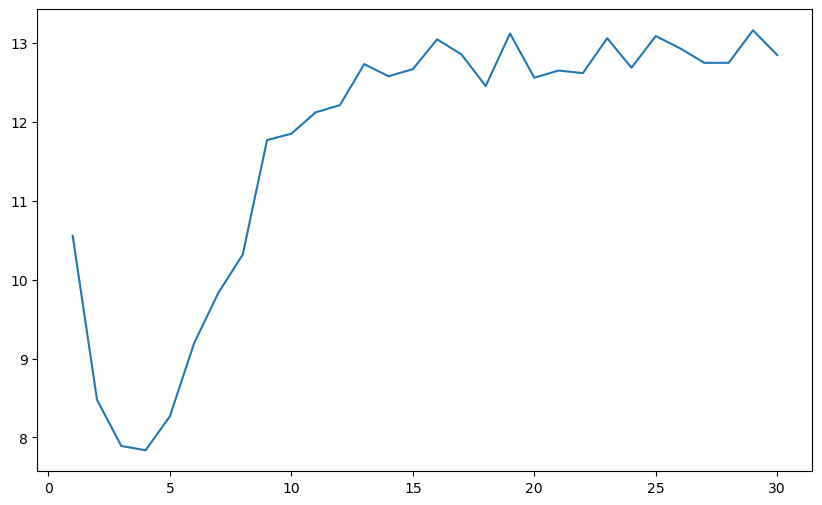

Looking at Change_idle_to_80kmh:
The model with lowest mean cv mse included had depth 4 and had an avg cv mse of 3.826941857803059


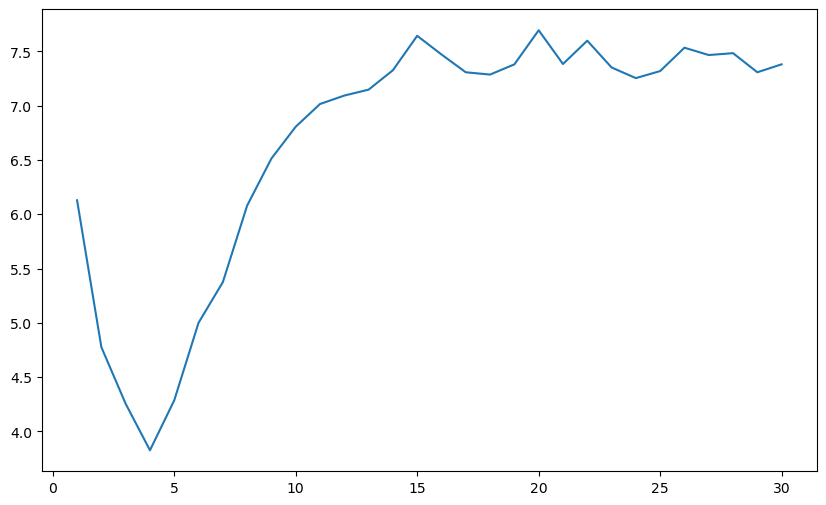

Looking at Change_idle_to_100kmh:
The model with lowest mean cv mse included had depth 3 and had an avg cv mse of 5.401192249995356


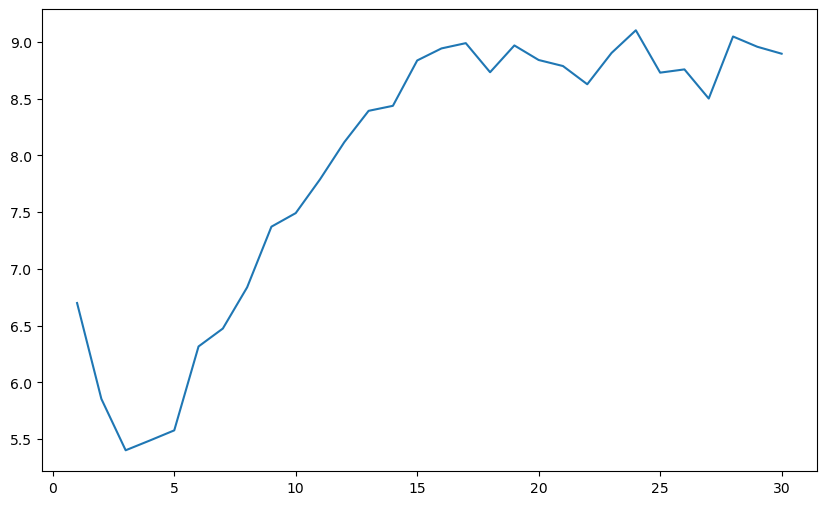

Looking at Change_idle_to_120kmh:
The model with lowest mean cv mse included had depth 3 and had an avg cv mse of 4.652146834365441


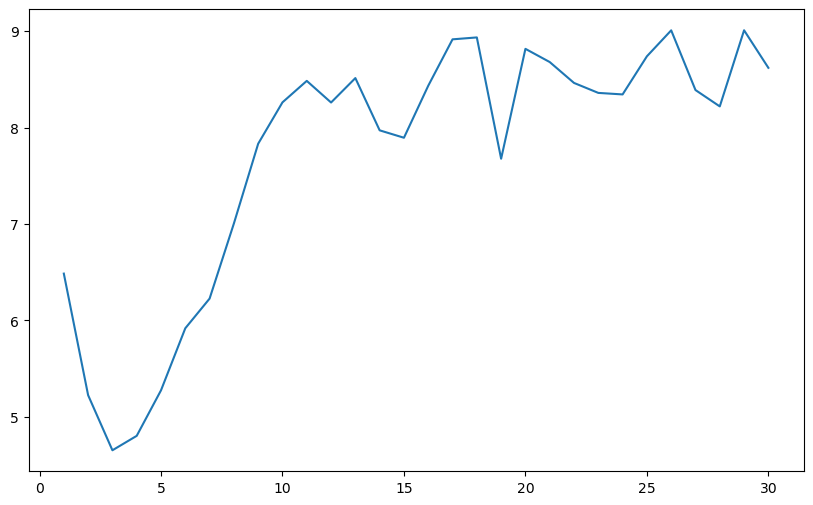

Looking at Change_idle_to_140kmh:
The model with lowest mean cv mse included had depth 4 and had an avg cv mse of 5.8131855138153945


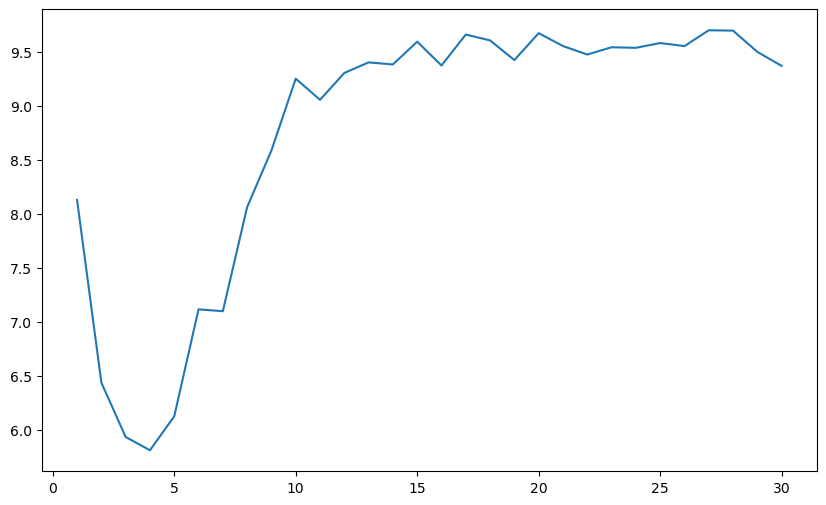

In [135]:
## Decision Tree Regression
predict_vars = ['Change_idle_to_50kmh',
        'Change_idle_to_80kmh',
        'Change_idle_to_100kmh',
        'Change_idle_to_120kmh',
        'Change_idle_to_140kmh']

kfold = KFold(n_splits = 5,
              shuffle = True,
              random_state = 332)

maxDepths = np.arange(1,31,1)

for var in predict_vars:
    DTav_mses = np.zeros(30)
    
    for n in maxDepths:
        DTR = DecisionTreeRegressor(max_depth = n)

        DT_mses = np.zeros((5,2))

        i=0
        for train_index, test_index in kfold.split(dfc_train):
            train = dfc_train.iloc[train_index]
            test = dfc_train.iloc[test_index]
            dtreg = DTR.fit(train[C_features],train[var])
            dtpred = DTR.predict(test[C_features])
            DT_mses[i,1] = mean_squared_error(dtpred,test[var])
            i=i+1
        DTav_mses[n-1] = DT_mses[:,1].mean()

    plt.figure(figsize=(10,6))
    plt.plot(maxDepths,DTav_mses)
    print("Looking at "+var+":")
    print("The model with lowest mean cv mse included had depth", 
          maxDepths[np.argmin(DTav_mses)],
          "and had an avg cv mse of",
          DTav_mses.min())
    plt.show()


In [114]:
##DT Feature Importance

DT_Train = DecisionTreeRegressor(max_depth=3)

DT_Train.fit(dfc_train[C_features],dfc_train.Change_idle_to_140kmh)

x = DT_Train.feature_importances_

for i in range(len(x)):
    print('The Feature importance of ' + C_features[i] + ' is ' + str(x[i]))

The Feature importance of dB_at_idle is 0.6907610842194669
The Feature importance of model_width_mm_cqa is 0.046535175164614355
The Feature importance of model_height_mm_cqa is 0.1778657516936944
The Feature importance of model_wheelbase_mm_cqa is 0.08483798892222445


In [117]:
## Random Forests

kfold = KFold(n_splits = 5,
              shuffle = True,
              random_state = 1221)

RF_mses  = np.zeros((5,2))

predict_var = 'Change_idle_to_140kmh'

i = 0

for train_index, test_index in kfold.split(dfc_train):
    train = dfc_train.iloc[train_index]
    test = dfc_train.iloc[test_index]
    RF_model = RandomForestRegressor()
    RF_model.fit(train[C_features],train[predict_var])
    rf_pred = RF_model.predict(test[C_features])
    RF_mses[i,0] = mean_squared_error(rf_pred,test[predict_var])
    baseline = train[predict_var].mean()
    bl_pred = baseline*np.ones(len(test[predict_var]))
    RF_mses[i,1] = mean_squared_error(bl_pred,test[predict_var])
    i = i+1

print(RF_mses[:,0].mean())
print(RF_mses[:,1].mean())
print(RF_mses)

5.521872483700777
11.671974963492726
[[ 4.66433235  9.83994289]
 [ 6.65637457 11.1917018 ]
 [ 6.31735501 14.16625139]
 [ 5.06457263 13.77438738]
 [ 4.90672786  9.38759136]]


[0.66074194 0.00590008 0.01845166 0.31490632]
[0.52595441 0.12167005 0.10475381 0.24762172]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


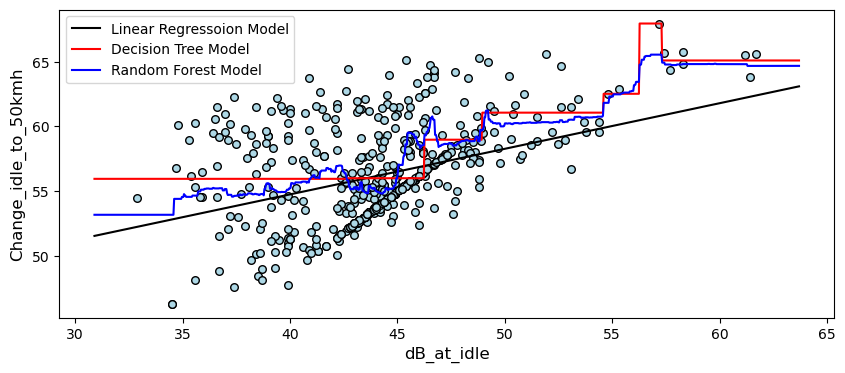

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


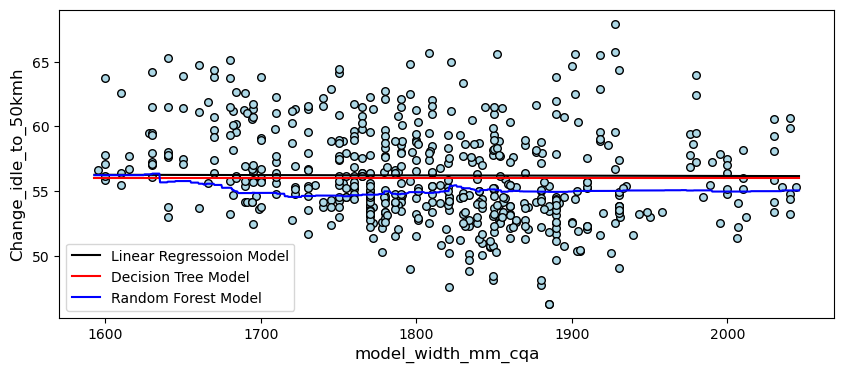

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


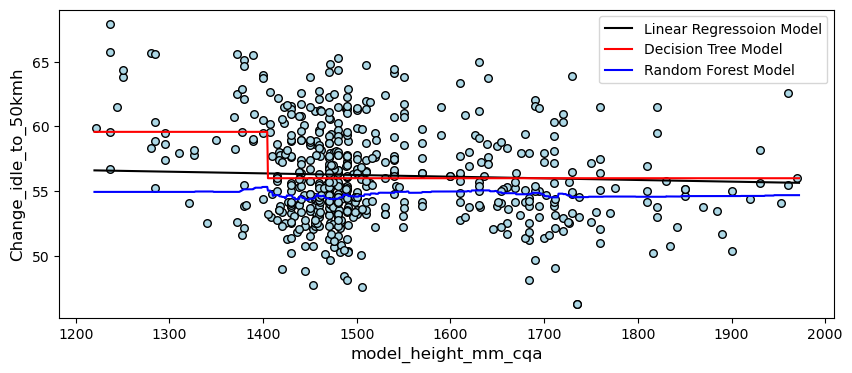

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


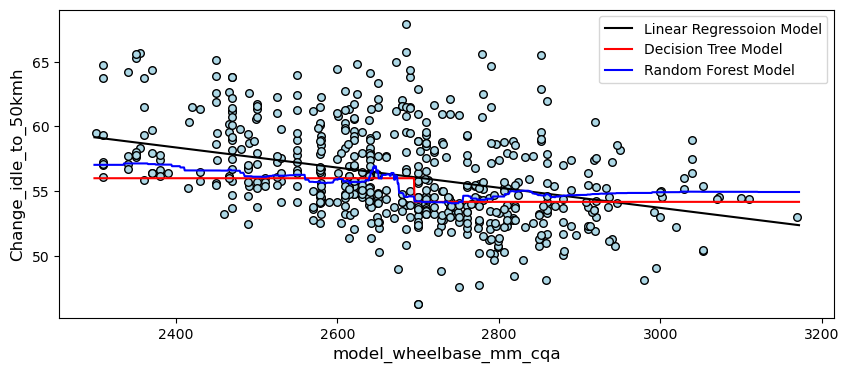

[0.70703987 0.04078012 0.01191818 0.24026183]
[0.55187423 0.10246406 0.10117139 0.24449032]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


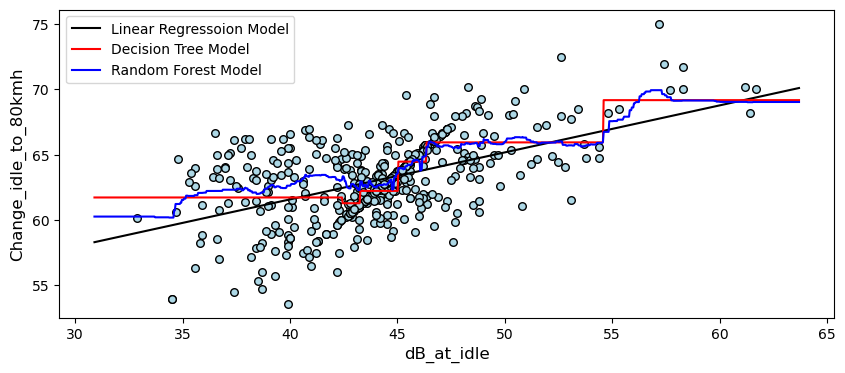

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


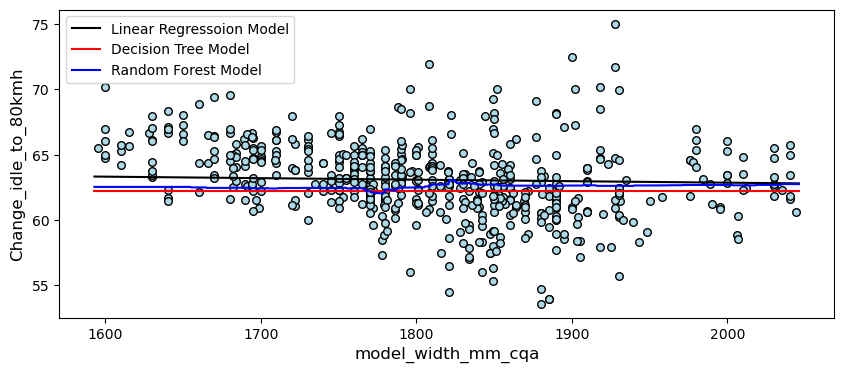

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


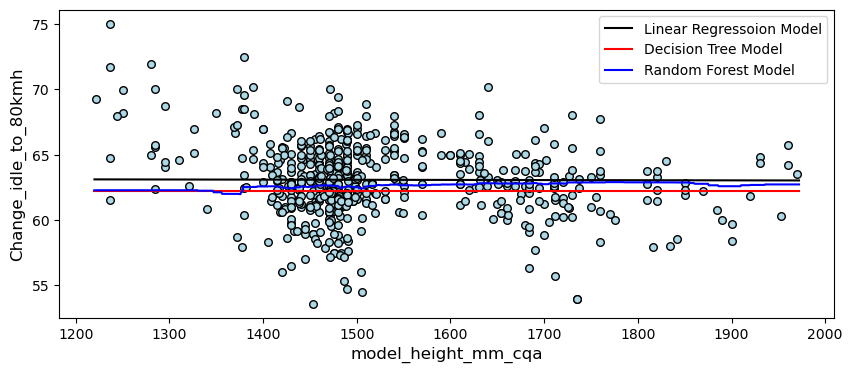

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


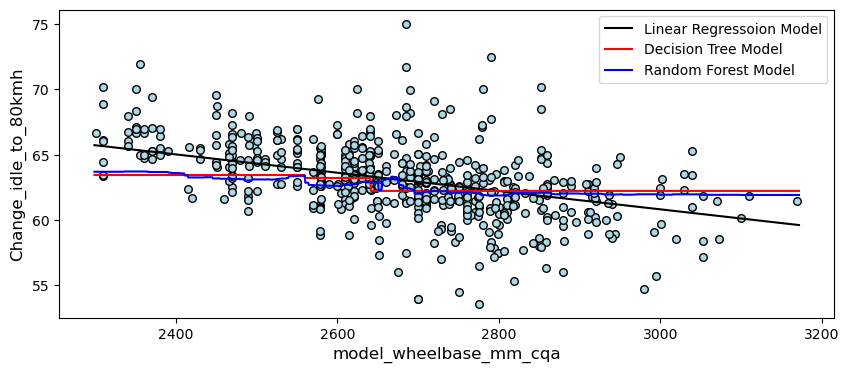

[0.61322623 0.09000116 0.03958325 0.25718936]
[0.46957086 0.13557349 0.13544282 0.25941283]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


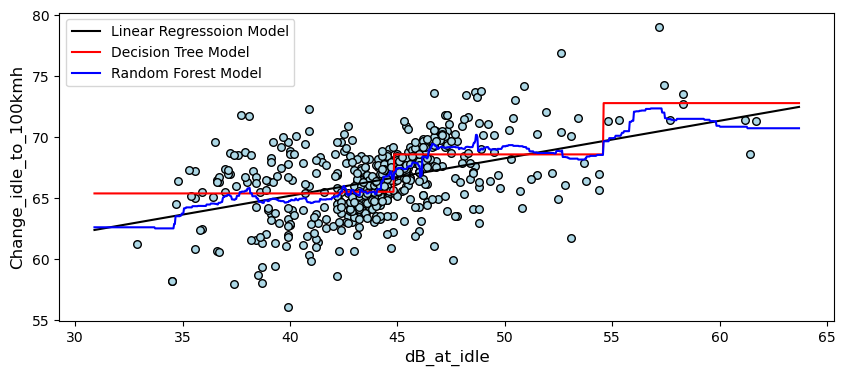

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


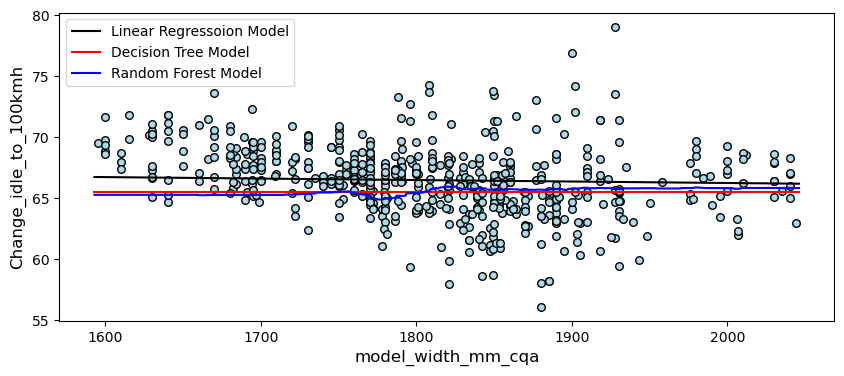

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


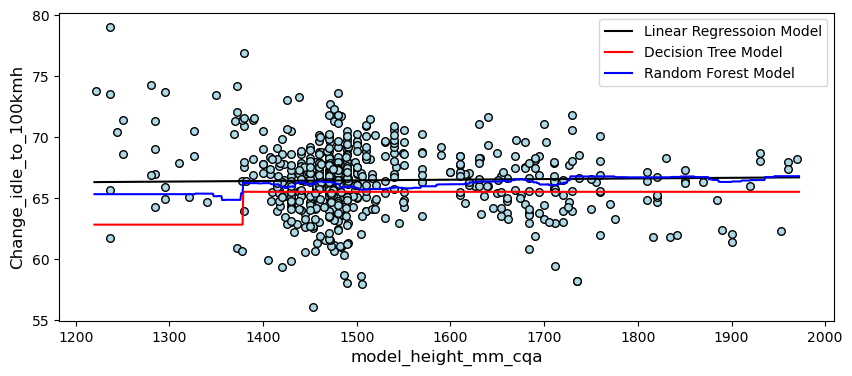

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


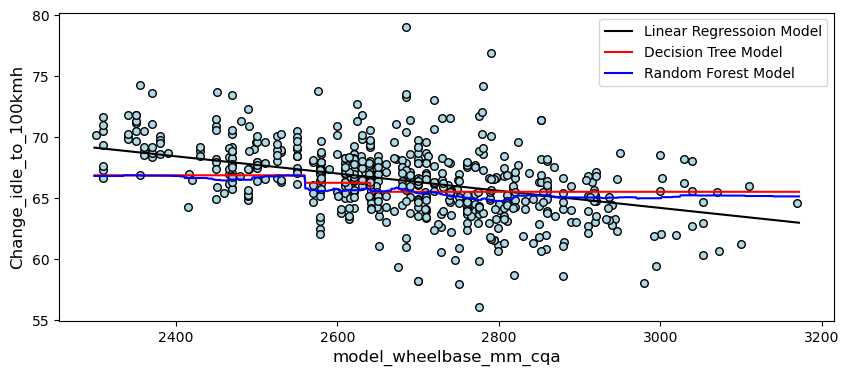

[0.62868652 0.03935697 0.11436515 0.21759136]
[0.54249191 0.10126725 0.13817111 0.21806973]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


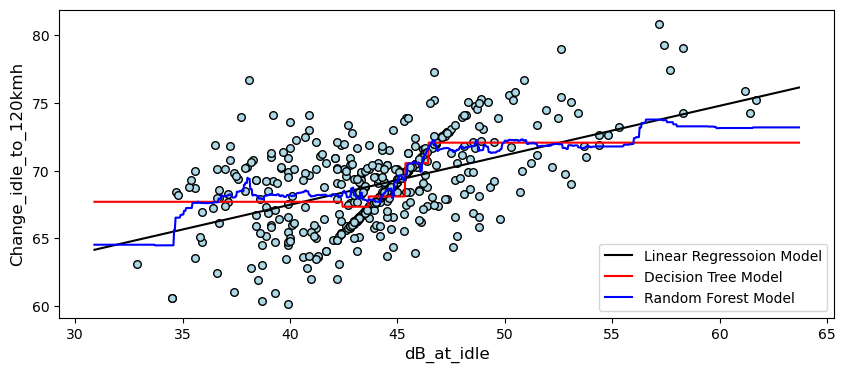

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


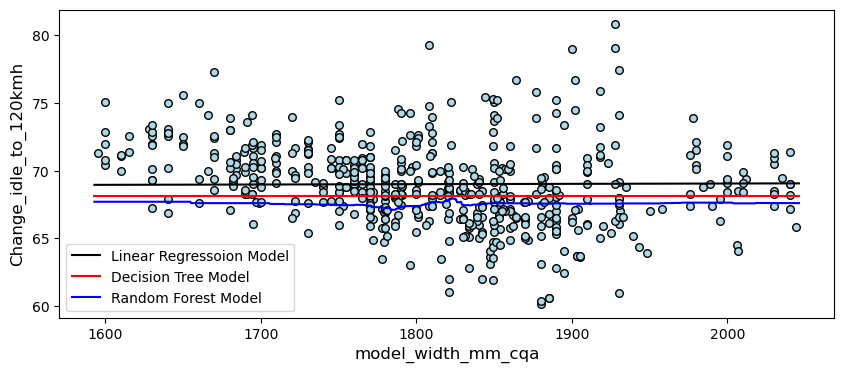

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


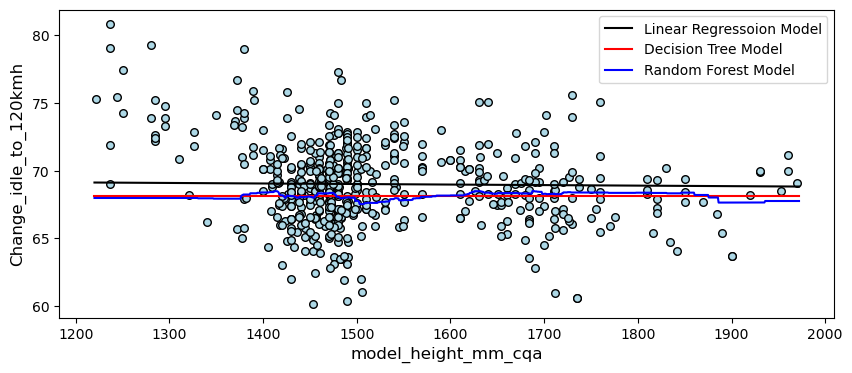

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


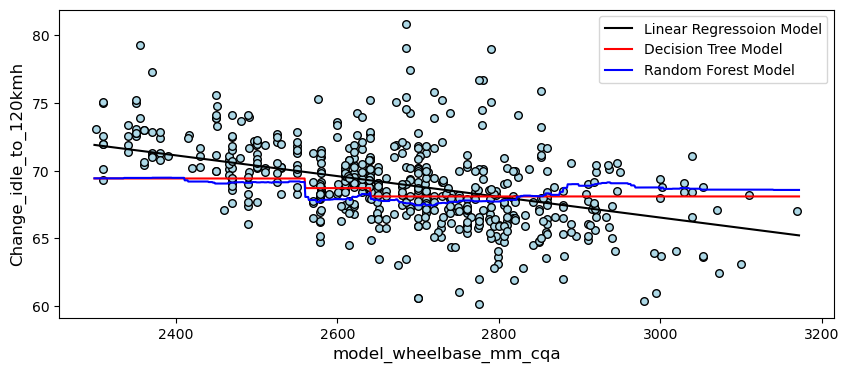

[0.64945715 0.         0.14927739 0.20126545]
[0.53179327 0.09335635 0.17259095 0.20225944]


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


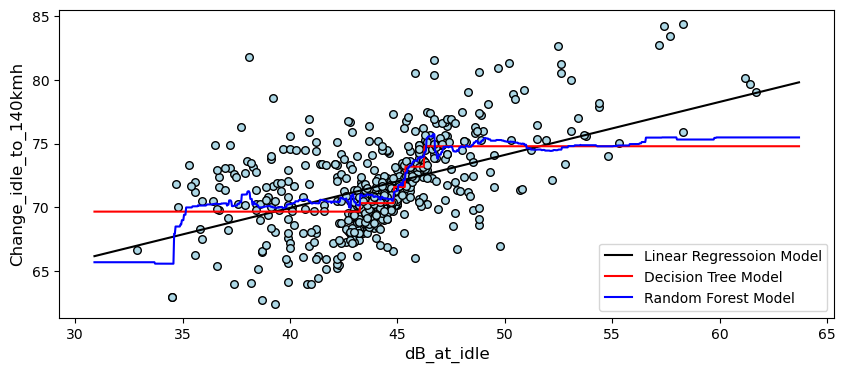

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


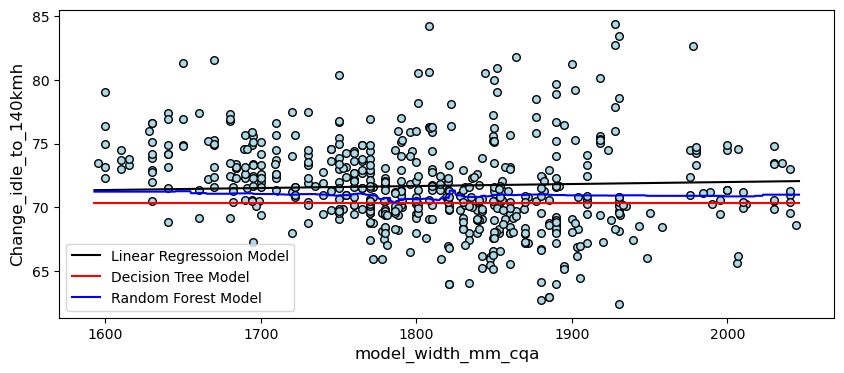

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


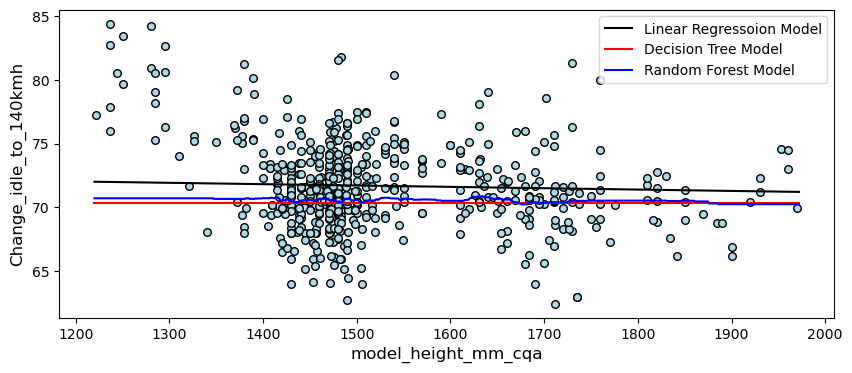

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


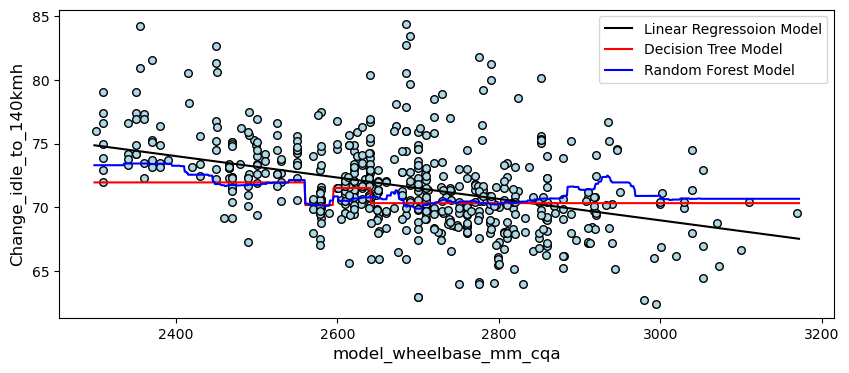

In [136]:
## Graphing

for var in predict_vars:
    lin_mod = LinearRegression()
    DT_mod = DecisionTreeRegressor(max_depth = 4)
    RF_mod = RandomForestRegressor()
    
    lin_mod.fit(dfc_train[C_features],dfc_train[var])
    DT_mod.fit(dfc_train[C_features],dfc_train[var])
    RF_mod.fit(dfc_train[C_features],dfc_train[var])
    
    print(DT_mod.feature_importances_)
    print(RF_mod.feature_importances_)
    
    for feat in C_features:
        plt.figure(figsize=(10,4))
        model_input_values = np.zeros((1000,len(C_features)))
        for new_feat in C_features:
            if new_feat == feat:
                model_input_values[:,C_features.index(new_feat)] = np.linspace(dfc_train[feat].min()-2,
                                                                               dfc_train[feat].max()+2,1000)
            else:
                model_input_values[:,C_features.index(new_feat)] = dfc_train[new_feat].mean()*np.ones(1000)
        Lin_pred = lin_mod.predict(model_input_values)
        DT_pred = DT_mod.predict(model_input_values)
        RF_pred = RF_mod.predict(model_input_values)
        plt.plot(model_input_values[:,C_features.index(feat)],
                Lin_pred,
                c='black',
                label = 'Linear Regressoion Model')
        plt.plot(model_input_values[:,C_features.index(feat)],
                DT_pred,
                c='red',
                label = 'Decision Tree Model')
        plt.plot(model_input_values[:,C_features.index(feat)],
                RF_pred,
                c='blue',
                label = 'Random Forest Model')
        plt.scatter(dfc_train[feat],
                    dfc_train[var],
                   s = 30,
                   edgecolors='black',
                   c='lightblue')
        plt.ylabel(var,fontsize = 12)
        plt.xlabel(feat,fontsize = 12)
        plt.legend()
        plt.savefig(feat+'vs'+var+'.png')
        plt.show()
        

In [137]:
for var in predict_vars:
    lin_mod = LinearRegression()
    DT_mod = DecisionTreeRegressor(max_depth = 4)
    RF_mod = RandomForestRegressor()
    
    lin_mod.fit(dfc_train[C_features],dfc_train[var])
    DT_mod.fit(dfc_train[C_features],dfc_train[var])
    RF_mod.fit(dfc_train[C_features],dfc_train[var])
    
    Lin_pred = lin_mod.predict(dfc_test[C_features])
    DT_pred = DT_mod.predict(dfc_test[C_features])
    RF_pred = RF_mod.predict(dfc_test[C_features])
    print(RF_mod.feature_importances_)
    print('The mean squared error for ',
         var,
         ' with a Linear regressor was ',
         mean_squared_error(Lin_pred,dfc_test[var]))
    print('The mean squared error for ',
         var,
         ' with a Decision Tree regressor was ',
         mean_squared_error(DT_pred,dfc_test[var]))
    print('The mean squared error for ',
         var,
         ' with a Random Forest regressor was ',
         mean_squared_error(RF_pred,dfc_test[var]))

[0.5224004  0.12134597 0.11214708 0.24410655]
The mean squared error for  Change_idle_to_50kmh  with a Linear regressor was  9.02706193690685
The mean squared error for  Change_idle_to_50kmh  with a Decision Tree regressor was  8.53738596760673
The mean squared error for  Change_idle_to_50kmh  with a Random Forest regressor was  7.643113983504589
[0.55819633 0.10445266 0.09357455 0.24377645]
The mean squared error for  Change_idle_to_80kmh  with a Linear regressor was  4.122021903124881
The mean squared error for  Change_idle_to_80kmh  with a Decision Tree regressor was  4.01189658712738
The mean squared error for  Change_idle_to_80kmh  with a Random Forest regressor was  3.717207403424955
[0.47620743 0.15006678 0.12841437 0.24531142]
The mean squared error for  Change_idle_to_100kmh  with a Linear regressor was  4.744469373629325
The mean squared error for  Change_idle_to_100kmh  with a Decision Tree regressor was  4.527168589464648
The mean squared error for  Change_idle_to_100kmh  w

In [9]:
##Engine Analysis
Engine_feats = ['dB_at_idle',
        ##'model_seats_cqa',
        'model_engine_type_cqa_cleaned',
        'model_engine_cc_cqa',
        ##'model_doors_cqa',
        ##'model_transmission_type_cqa',
        ##'model_body_cqa_cleaned',
        'model_drive_cqa_cleaned',
        'model_engine_power_hp_cqa',
        ##'model_weight_lbs_cqa',
        'model_engine_torque_lbft_cqa',
        ##'model_width_mm_cqa',
        ##'model_height_mm_cqa',
        'model_engine_fuel_cqa_cleaned']

df_engine_select = df1[Engine_feats]
df_engine_select = df_engine_select.dropna()
df_engine_select = df_engine_select.loc[df_engine_select.dB_at_idle>40]
df_engine_select = df_engine_select.loc[(df_engine_select.model_engine_fuel_cqa_cleaned == 'Gasoline')|
                                        (df_engine_select.model_engine_fuel_cqa_cleaned =='Diesel')]
df_engine_select = df_engine_select.loc[(df_engine_select.model_engine_type_cqa_cleaned == 'in-line')|
                                       (df_engine_select.model_engine_type_cqa_cleaned == 'V')]
print(df_engine_select.shape)
for feat in ['model_engine_type_cqa_cleaned','model_drive_cqa_cleaned','model_engine_fuel_cqa_cleaned']:
    print(df_engine_select[feat].value_counts())

(733, 7)
in-line    539
V          194
Name: model_engine_type_cqa_cleaned, dtype: int64
Front              451
All Wheel Drive    184
Rear                98
Name: model_drive_cqa_cleaned, dtype: int64
Gasoline    609
Diesel      124
Name: model_engine_fuel_cqa_cleaned, dtype: int64


In [22]:
## Getting Dummies

df_engine_select['in-line_engine_type'] = pd.get_dummies(df_engine_select['model_engine_type_cqa_cleaned'])['in-line'].copy()
df_engine_select['gasoline_fuel_type'] = pd.get_dummies(df_engine_select['model_engine_fuel_cqa_cleaned'])['Gasoline'].copy()
df_engine_select['FWD_drive_type'] = pd.get_dummies(df_engine_select['model_drive_cqa_cleaned'])['Front'].copy()
df_engine_select['AWD_drive_type'] = pd.get_dummies(df_engine_select['model_drive_cqa_cleaned'])['All Wheel Drive'].copy()

In [39]:
from sklearn.model_selection import train_test_split

dfe_train, dfe_test = train_test_split(df_engine_select,
                                      random_state = 154,
                                      test_size = .2,
                                      stratify=df_engine_select['model_engine_type_cqa_cleaned'])

In [24]:
E_features = ['model_engine_type_cqa_cleaned',
              'model_engine_cc_cqa',
              'model_drive_cqa_cleaned',
              'model_engine_power_hp_cqa',
              'model_engine_torque_lbft_cqa',
              'model_engine_fuel_cqa_cleaned']
models_E = powerset(E_features)
models_E.append('baseline')
for i in range(len(models_E)):
    if 'model_engine_type_cqa_cleaned' in models_E[i]:
        models_E[i].remove('model_engine_type_cqa_cleaned')
        models_E[i].append('in-line_engine_type')
    if 'model_drive_cqa_cleaned' in models_E[i]:
        models_E[i].remove('model_drive_cqa_cleaned')
        models_E[i].extend(['FWD_drive_type','AWD_drive_type'])
    if 'model_engine_fuel_cqa_cleaned' in models_E[i]:
        models_E[i].remove('model_engine_fuel_cqa_cleaned')
        models_E[i].append('gasoline_fuel_type')
        
print(len(models_E))

64


In [32]:
##Linear Regression

var = 'dB_at_idle'


for x in range(30):
    
    kfold = KFold(n_splits = 5,
              shuffle = True,
              random_state = 110+x)
    
    cv_mses = np.zeros((5,len(models_E)))
    
    i=0
    for train_index, test_index in kfold.split(dfe_train):
        train = dfe_train.iloc[train_index]
        test = dfe_train.iloc[test_index]
        j=0
        for model in models_E:
            if model == 'baseline':
                train_mean = train[var].mean()
                predict = train_mean*np.ones(len(test))
                cv_mses[i,j] = mean_squared_error(predict,test[var])
            else:
                reg = LinearRegression(copy_X = True)
                reg.fit(train[model],train[var])
                predict = reg.predict(test[model])
                cv_mses[i,j] = mean_squared_error(predict,test[var])
            j = j+1
        i=i+1
    print("Looking at "+var+":")
    print("The model with lowest mean cv mse included the features", 
          models_E[np.argmin(np.mean(cv_mses, axis=0))],
          "and had an avg cv mse of",
          np.mean(cv_mses, axis=0)[np.argmin(np.mean(cv_mses, axis=0))])
    print('Baseline had mean cv of',
         np.mean(cv_mses, axis=0)[-1])

Looking at dB_at_idle:
The model with lowest mean cv mse included the features ['model_engine_power_hp_cqa', 'in-line_engine_type', 'FWD_drive_type', 'AWD_drive_type'] and had an avg cv mse of 7.8302374926540494
Baselin had mean cv of 9.11672007090981
Looking at dB_at_idle:
The model with lowest mean cv mse included the features ['model_engine_power_hp_cqa', 'in-line_engine_type', 'FWD_drive_type', 'AWD_drive_type'] and had an avg cv mse of 7.756164226745616
Baselin had mean cv of 9.08700152979179
Looking at dB_at_idle:
The model with lowest mean cv mse included the features ['model_engine_power_hp_cqa', 'in-line_engine_type', 'FWD_drive_type', 'AWD_drive_type'] and had an avg cv mse of 8.067483490188305
Baselin had mean cv of 9.10688763847959
Looking at dB_at_idle:
The model with lowest mean cv mse included the features ['model_engine_power_hp_cqa', 'in-line_engine_type', 'FWD_drive_type', 'AWD_drive_type'] and had an avg cv mse of 7.886700882162083
Baselin had mean cv of 9.1034887508

Looking at dB_at_idle:
The model with lowest mean cv mse included had depth 2 and had an avg cv mse of 7.476205244402706


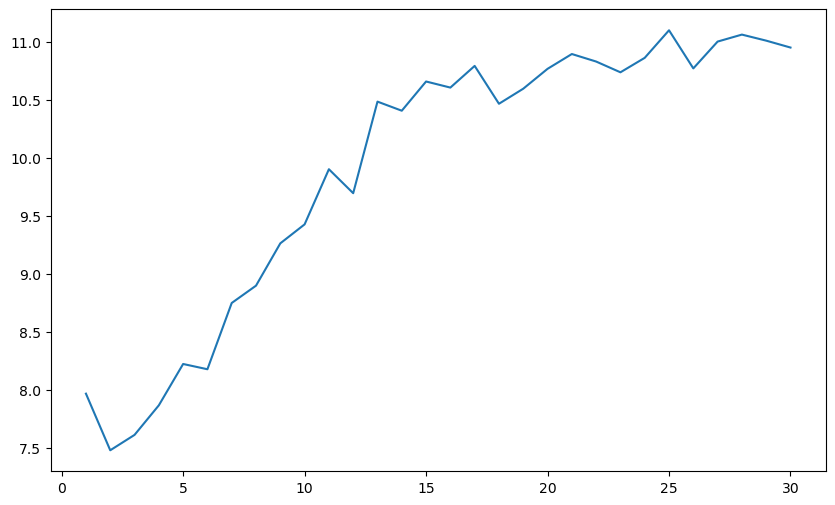

In [50]:
predict_vars = ['dB_at_idle']

E_features_used = ['in-line_engine_type',
              'model_engine_cc_cqa',
              'model_engine_power_hp_cqa',
              'model_engine_torque_lbft_cqa',
              'FWD_drive_type',
              'AWD_drive_type',
              'gasoline_fuel_type']
dfe_train, dfe_test = train_test_split(df_engine_select,
                                      random_state = 154,
                                      test_size = .2,
                                      stratify=df_engine_select['model_engine_type_cqa_cleaned'])

kfold = KFold(n_splits = 5,
              shuffle = True,
              random_state = 112)

maxDepths = np.arange(1,31,1)

for var in predict_vars:
    DTav_mses = np.zeros(30)
    
    for n in maxDepths:
        DTR = DecisionTreeRegressor(max_depth = n)

        DT_mses = np.zeros((5,2))

        i=0
        for train_index, test_index in kfold.split(dfe_train):
            train = dfe_train.iloc[train_index]
            test = dfe_train.iloc[test_index]
            dtreg = DTR.fit(train[E_features_used],train[var])
            dtpred = DTR.predict(test[E_features_used])
            DT_mses[i,1] = mean_squared_error(dtpred,test[var])
            i=i+1
        DTav_mses[n-1] = DT_mses[:,1].mean()

    plt.figure(figsize=(10,6))
    plt.plot(maxDepths,DTav_mses)
    print("Looking at "+var+":")
    print("The model with lowest mean cv mse included had depth", 
          maxDepths[np.argmin(DTav_mses)],
          "and had an avg cv mse of",
          DTav_mses.min())
    plt.show()

In [45]:
##DT Feature Importance

Importance_Matrix = np.zeros((30,7))

j=0

for x in range(30):
    dfe_train, dfe_test = train_test_split(df_engine_select,
                                      random_state = 150+x,
                                      test_size = .2,
                                      stratify=df_engine_select['model_engine_type_cqa_cleaned'])
    
    DT_Train = DecisionTreeRegressor(max_depth=4)
    
    DT_Train.fit(dfe_train[E_features_used],dfe_train.dB_at_idle)
    
    x = DT_Train.feature_importances_
    
    for i in range(len(x)):
        Importance_Matrix[j,i] = x[i]
    
    j+=1

In [46]:
for i in range(len(E_features_used)):
    print('The average importance of ',
         E_features_used[i],
         'is',
         Importance_Matrix[:,i].mean())

The average importance of  in-line_engine_type is 0.008142114227659612
The average importance of  model_engine_cc_cqa is 0.6841702740327793
The average importance of  model_engine_power_hp_cqa is 0.24615883557060783
The average importance of  model_engine_torque_lbft_cqa is 0.05401909548438755
The average importance of  FWD_drive_type is 0.0
The average importance of  AWD_drive_type is 0.005259412547563009
The average importance of  gasoline_fuel_type is 0.002250268137002562


In [49]:
## Random forests
dfe_train, dfe_test = train_test_split(df_engine_select,
                                      random_state = 154,
                                      test_size = .2,
                                      stratify=df_engine_select['model_engine_type_cqa_cleaned'])

kfold = KFold(n_splits = 5,
              shuffle = True,
              random_state = 112)

RF_mses  = np.zeros((5,2))

predict_var = 'dB_at_idle'

i = 0

for train_index, test_index in kfold.split(dfe_train):
    train = dfe_train.iloc[train_index]
    test = dfe_train.iloc[test_index]
    RF_model = RandomForestRegressor()
    RF_model.fit(train[E_features_used],train[predict_var])
    rf_pred = RF_model.predict(test[E_features_used])
    RF_mses[i,0] = mean_squared_error(rf_pred,test[predict_var])
    baseline = train[predict_var].mean()
    bl_pred = baseline*np.ones(len(test[predict_var]))
    RF_mses[i,1] = mean_squared_error(bl_pred,test[predict_var])
    i = i+1

print(RF_mses[:,0].mean())
print(RF_mses[:,1].mean())
print(RF_mses)

8.0572633191916
8.806330370640689
[[ 5.70083945  7.41859249]
 [10.58851859  6.40341023]
 [ 7.98250502 10.02044802]
 [ 7.39793544 11.54393438]
 [ 8.6165181   8.64526672]]


In [9]:
##Feature Selection

feats = ['dB_at_idle',
        'dB_at_50kmh',
        'dB_at_80kmh',
        'dB_at_100kmh',
        'dB_at_120kmh',
        'dB_at_140kmh',
        'Change_idle_to_50kmh',
        'Change_idle_to_80kmh',
        'Change_idle_to_100kmh',
        'Change_idle_to_120kmh',
        'Change_idle_to_140kmh',
        ##'model_seats_cqa',
        'model_engine_type_cqa_cleaned',
        'model_engine_cc_cqa',
        'model_doors_cqa',
        ##'model_transmission_type_cqa',
        'model_body_cqa_cleaned',
        'model_drive_cqa_cleaned',
        'model_engine_power_hp_cqa',
        'model_weight_lbs_cqa',
        'model_engine_torque_lbft_cqa',
        'model_width_mm_cqa',
        'model_height_mm_cqa',
        'model_engine_fuel_cqa_cleaned',
        'model_wheelbase_mm_cqa']

df_selec = df1[feats].copy()
df_selec = df_selec.dropna()
print(df_selec.shape)
df_selec = df_selec.loc[(df_selec.model_body_cqa_cleaned=='SUV')|(df_selec.model_body_cqa_cleaned=='Hatchback')|(df_selec.model_body_cqa_cleaned=='Sedan')|(df_selec.model_body_cqa_cleaned=='Minivan')|(df_selec.model_body_cqa_cleaned=='Midsize Cars')]
##print(df_selec.shape)
##df_selec = df_selec.loc[df_selec.model_seats_cqa >3]
print(df_selec.shape)
df_selec = df_selec.loc[df_selec.model_doors_cqa>2]
print(df_selec.shape)
for x in ['boxer','Flat','W','Not Available','electric','single']:
    df_selec = df_selec.drop(df_selec[(df_selec.model_engine_type_cqa_cleaned==x)].index)
print(df_selec.shape)
for x in ['Gasoline / Electric Hybrid','Flex Fuel']:
    df_selec = df_selec.drop(df_selec[df_selec.model_engine_fuel_cqa_cleaned == x].index)
##df_selec['Manual'] = pd.get_dummies(df_selec['model_transmission_type_cqa'])['Manual'].copy()
print(df_selec.shape)
df_selec = df_selec.drop(df_selec[df_selec.model_wheelbase_mm_cqa<2200].index)
print(df_selec.shape)
df_selec['SUV'] = pd.get_dummies(df_selec['model_body_cqa_cleaned'])['SUV'].copy()
df_selec['in-line'] = pd.get_dummies(df_selec['model_engine_type_cqa_cleaned'])['in-line'].copy()
df_selec['All Wheel Drive'] = pd.get_dummies(df_selec['model_drive_cqa_cleaned'])['All Wheel Drive'].copy()
df_selec['Front'] = pd.get_dummies(df_selec['model_drive_cqa_cleaned'])['Front'].copy()
df_selec['Gas'] = pd.get_dummies(df_selec['model_engine_fuel_cqa_cleaned'])['Gasoline'].copy()
print(df_selec.model_body_cqa_cleaned.value_counts())
print(df_selec.model_engine_type_cqa_cleaned.value_counts())
print(df_selec.model_drive_cqa_cleaned.value_counts())
df_selec.model_engine_fuel_cqa_cleaned.value_counts()

(578, 23)
(453, 23)
(449, 23)
(430, 23)
(403, 23)
(401, 23)
Hatchback    150
Sedan        146
SUV           72
Minivan       33
Name: model_body_cqa_cleaned, dtype: int64
in-line    306
V           95
Name: model_engine_type_cqa_cleaned, dtype: int64
Front              298
All Wheel Drive     70
Rear                33
Name: model_drive_cqa_cleaned, dtype: int64


Gasoline    322
Diesel       79
Name: model_engine_fuel_cqa_cleaned, dtype: int64

In [23]:
##Splitting

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_selec,
                                    random_state = 122,
                                    test_size = .2,
                                    stratify = df_selec[['model_engine_type_cqa_cleaned',
                                                'model_engine_fuel_cqa_cleaned',
                                                'model_body_cqa_cleaned']])

In [19]:
features = ['model_engine_type_cqa_cleaned',
        ##'model_transmission_type_cqa',
        'model_body_cqa_cleaned',
        'model_drive_cqa_cleaned',
        'model_engine_power_hp_cqa',
        'model_weight_lbs_cqa',
        'model_engine_torque_lbft_cqa',
        'model_engine_cc_cqa',
        'model_width_mm_cqa',
        'model_height_mm_cqa',
        'model_engine_fuel_cqa_cleaned',
        'model_wheelbase_mm_cqa']
models = powerset(features)
for i in range(len(models)):
    if 'model_body_cqa_cleaned' in models[i]:
        models[i].remove('model_body_cqa_cleaned')
        models[i].append('SUV')
    if 'model_engine_type_cqa_cleaned' in models[i]:
        models[i].remove('model_engine_type_cqa_cleaned')
        models[i].append('in-line')
    if 'model_drive_cqa_cleaned' in models[i]:
        models[i].remove('model_drive_cqa_cleaned')
        models[i].extend(['All Wheel Drive','Front'])
    if 'model_transmission_type_cqa' in models[i]:
        models[i].remove('model_transmission_type_cqa')
        models[i].append('Manual')
    if 'model_engine_fuel_cqa_cleaned' in models[i]:
        models[i].remove('model_engine_fuel_cqa_cleaned')
        models[i].append('Gas')
##print(models)
models.append('baseline')
print(len(models))

2048


In [28]:
##Predicting

kfold = StratifiedKFold(n_splits = 5,
                       shuffle = True,
                       random_state = 322)

b = 'Change_idle_to_50kmh'

cv_mses = np.zeros((5,len(models)))

i=0
for train_index, test_index in kfold.split(df_train,df_train['in-line']):
    train = df_train.iloc[train_index]
    test = df_train.iloc[test_index]
    j=0
    for model in models:
        if model == 'baseline':
            train_mean = train[b].mean()
            predict = train_mean*np.ones(len(test))
            cv_mses[i,j] = mean_squared_error(predict,test[b])
        else:
            reg = LinearRegression(copy_X = True)
            reg.fit(train[model],train[b])
            predict = reg.predict(test[model])
            cv_mses[i,j] = mean_squared_error(predict,test[b])
        j = j+1
    i=i+1


## which model had lowest mean mse?
print("The model with lowest mean cv mse included the features", 
      models[np.argmin(np.mean(cv_mses, axis=0))],
      "and had an avg cv mse of",
      np.mean(cv_mses, axis=0)[np.argmin(np.mean(cv_mses, axis=0))])
print(np.mean(cv_mses, axis=0)[-1])

The model with lowest mean cv mse included the features ['model_engine_power_hp_cqa', 'model_weight_lbs_cqa', 'model_wheelbase_mm_cqa', 'All Wheel Drive', 'Front', 'Gas'] and had an avg cv mse of 10.032111242147783
12.326971202807096


<function matplotlib.pyplot.show(close=None, block=None)>

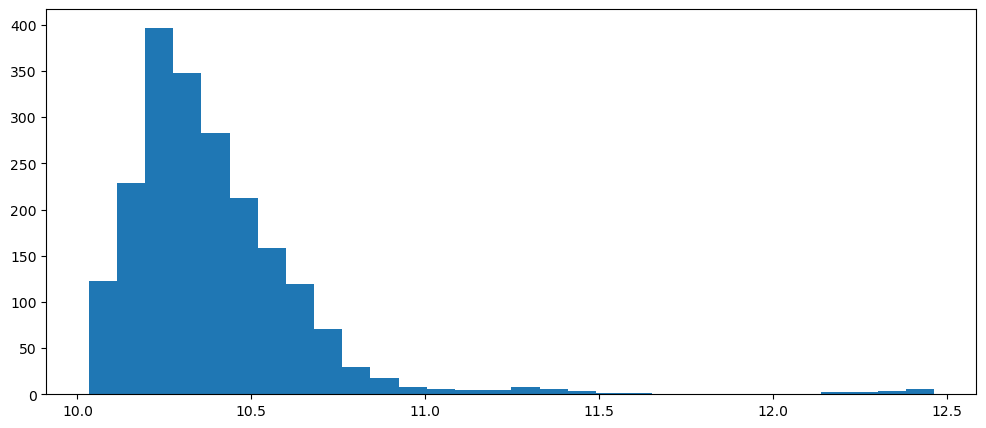

In [29]:
plt.figure(figsize=(12,5))
plt.hist(np.mean(cv_mses, axis=0), bins = 30)
plt.show

8.417533267388588
774.2666000976562
49


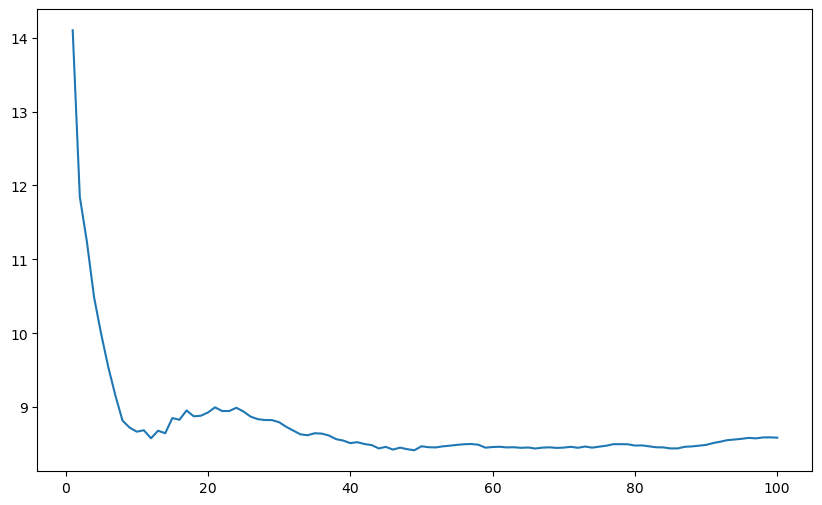

In [18]:
## KNN Regression Model

from sklearn.neighbors import KNeighborsRegressor

knn_features = [##'model_engine_type_cqa_cleaned',
        ##'model_transmission_type_cqa',
        ##'model_body_cqa_cleaned',
        ##'model_drive_cqa_cleaned',
        'model_engine_power_hp_cqa',
        'model_weight_lbs_cqa',
        'model_engine_torque_lbft_cqa',
        'model_engine_cc_cqa',
        'model_width_mm_cqa',
        'model_height_mm_cqa',
        ##'model_engine_fuel_cqa_cleaned',
        'model_wheelbase_mm_cqa',
        'Gas',
        'Front',
        'All Wheel Drive',
        'in-line']

predict_var = 'dB_at_140kmh'

from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5,
              shuffle = True,
              random_state = 322)

neighbors = np.arange(1,101,1)

avknn_mses = np.zeros(100)

for n in neighbors:
    knr_10 = KNeighborsRegressor(n)
    
    knn_mses = np.zeros((5,2))
    
    i=0
    for train_index, test_index in kfold.split(df_train):
        train = df_train.iloc[train_index]
        test = df_train.iloc[test_index]
        knreg = knr_10.fit(train[knn_features],train[predict_var])
        knpred = knr_10.predict(test[knn_features])
        knn_mses[i,1] = mean_squared_error(knpred,test[predict_var])
        train_mean = train.dB_at_idle.mean()
        mean_pred = train_mean*np.ones(len(test[predict_var]))
        knn_mses[i,0] = mean_squared_error(mean_pred, test[predict_var])
        i=i+1
    avknn_mses[n-1] = knn_mses[:,1].mean()

plt.figure(figsize=(10,6))
plt.plot(neighbors,avknn_mses)
print(avknn_mses.min())
print(knn_mses[:,0].mean())
print(neighbors[np.argmin(avknn_mses)])
plt.show()

8.39288494528778
2


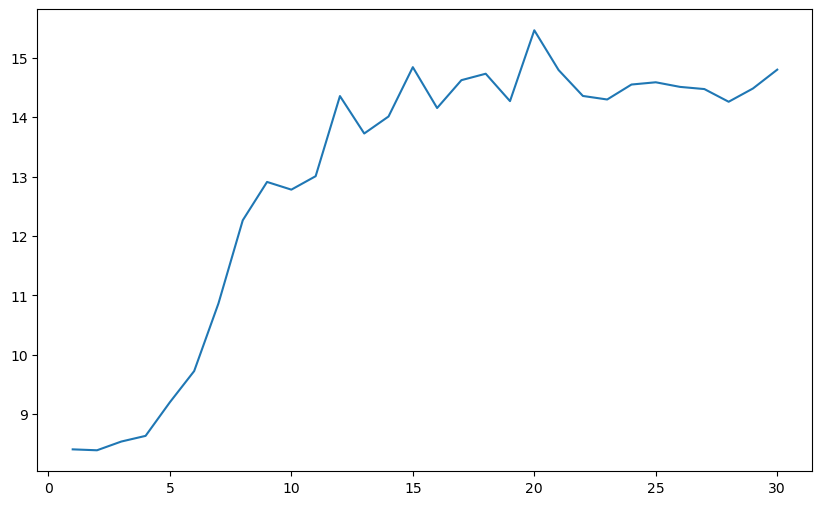

In [19]:
## Decision Tree Regression Model

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import KFold

DT_features = [##'model_engine_type_cqa_cleaned',
        ##'model_transmission_type_cqa',
        ##'model_body_cqa_cleaned',
        ##'model_drive_cqa_cleaned',
        'model_engine_power_hp_cqa',
        'model_weight_lbs_cqa',
        'model_engine_torque_lbft_cqa',
        'model_engine_cc_cqa',
        'model_width_mm_cqa',
        'model_height_mm_cqa',
        ##'model_engine_fuel_cqa_cleaned',
        'model_wheelbase_mm_cqa',
        'Gas',
        'All Wheel Drive',
        'Front',
        'in-line',
        'SUV']

predict_var = 'dB_at_idle'

kfold = KFold(n_splits = 4,
              shuffle = True,
              random_state = 261)

maxDepths = np.arange(1,31,1)

DTav_mses = np.zeros(30)

for n in maxDepths:
    DTR = DecisionTreeRegressor(max_depth = n)
    
    DT_mses = np.zeros((4,2))
    
    i=0
    for train_index, test_index in kfold.split(df_train):
        train = df_train.iloc[train_index]
        test = df_train.iloc[test_index]
        dtreg = DTR.fit(train[DT_features],train[predict_var])
        dtpred = DTR.predict(test[DT_features])
        DT_mses[i,1] = mean_squared_error(dtpred,test[predict_var])
        train_mean = train.dB_at_idle.mean()
        mean_pred = train_mean*np.ones(len(test[predict_var]))
        DT_mses[i,0] = mean_squared_error(mean_pred, test[predict_var])
        i=i+1
    DTav_mses[n-1] = DT_mses[:,1].mean()

plt.figure(figsize=(10,6))
plt.plot(maxDepths,DTav_mses)
print(DTav_mses.min())
print(maxDepths[np.argmin(DTav_mses)])
plt.show()

In [24]:
## Decision Tree Feature Importance

newDTR = DecisionTreeRegressor(max_depth = 2)

newDTR.fit(df_train[DT_features],df_train.dB_at_idle)

x = newDTR.feature_importances_

for i in range(len(x)):
    print('The Feature importance of ' + DT_features[i] + ' is ' + str(x[i]))

The Feature importance of model_engine_power_hp_cqa is 0.0
The Feature importance of model_weight_lbs_cqa is 0.0
The Feature importance of model_engine_torque_lbft_cqa is 0.0
The Feature importance of model_engine_cc_cqa is 0.0
The Feature importance of model_width_mm_cqa is 0.062752159521112
The Feature importance of model_height_mm_cqa is 0.0
The Feature importance of model_wheelbase_mm_cqa is 0.937247840478888
The Feature importance of Gas is 0.0
The Feature importance of All Wheel Drive is 0.0
The Feature importance of Front is 0.0
The Feature importance of in-line is 0.0
The Feature importance of SUV is 0.0


In [33]:
## Random Forsts

from sklearn.ensemble import RandomForestRegressor

kfold = KFold(n_splits = 4,
              shuffle = True,
              random_state = 1221)

RF_mses  = np.zeros((4,2))

predict_var = 'dB_at_idle'

i = 0

for train_index, test_index in kfold.split(df_train):
    train = df_train.iloc[train_index]
    test = df_train.iloc[test_index]
    RF_model = RandomForestRegressor()
    RF_model.fit(train[DT_features],train[predict_var])
    rf_pred = RF_model.predict(test[DT_features])
    RF_mses[i,0] = mean_squared_error(rf_pred,test[predict_var])
    baseline = train[predict_var].mean()
    bl_pred = baseline*np.ones(len(test[predict_var]))
    RF_mses[i,1] = mean_squared_error(bl_pred,test[predict_var])
    i = i+1

print(RF_mses[:,0].mean())
print(RF_mses[:,1].mean())
print(RF_mses)

7.892308276377622
8.727785677083332
[[ 8.22603926 11.28243403]
 [ 8.82605335  8.27246736]
 [ 6.70863119  6.91538663]
 [ 7.80850931  8.44085469]]


(453, 14)


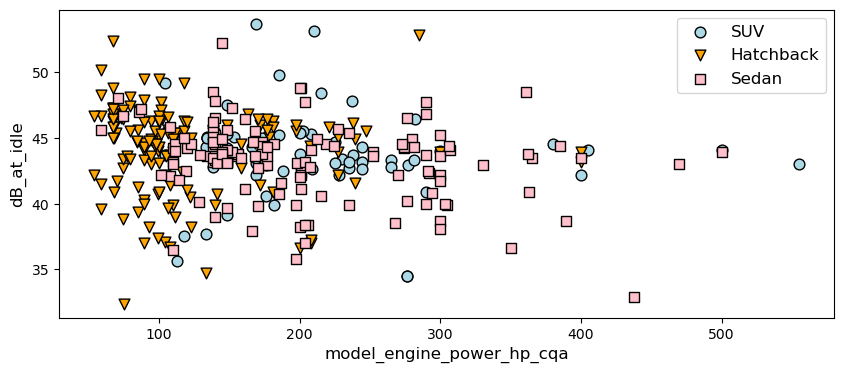

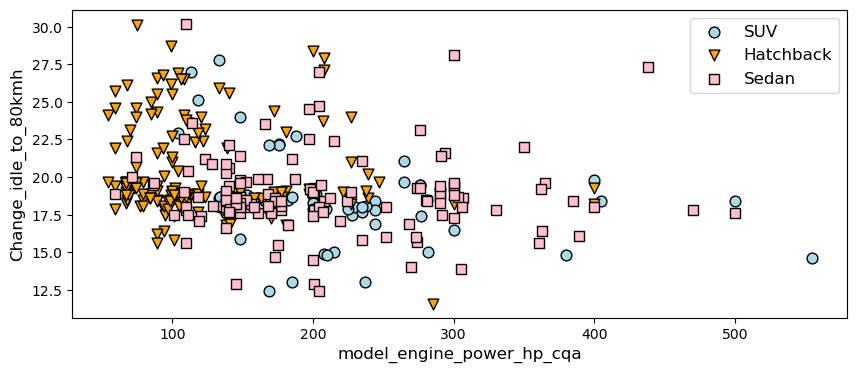

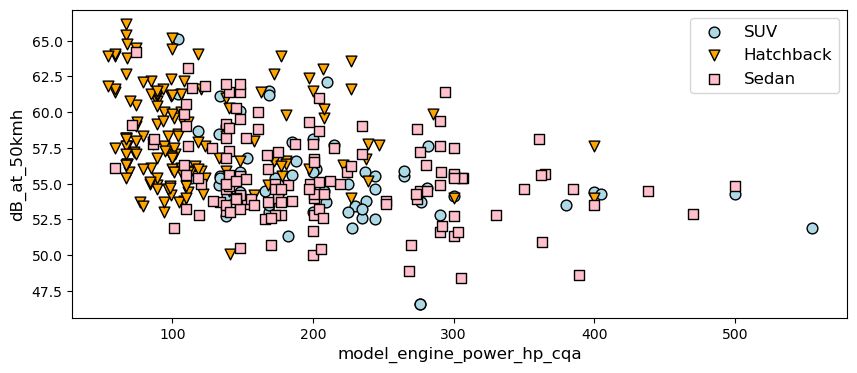

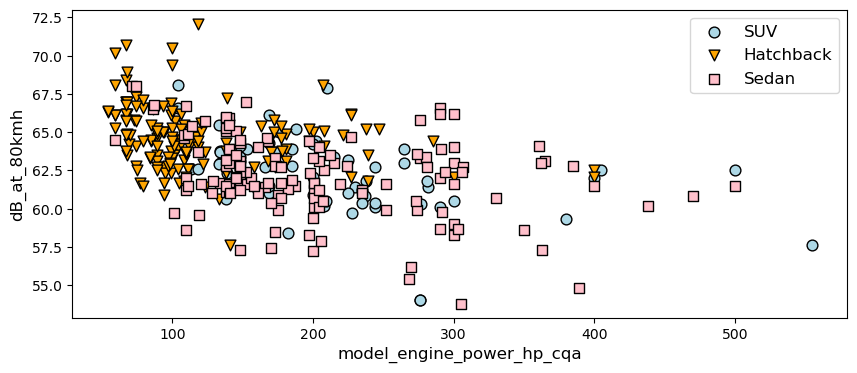

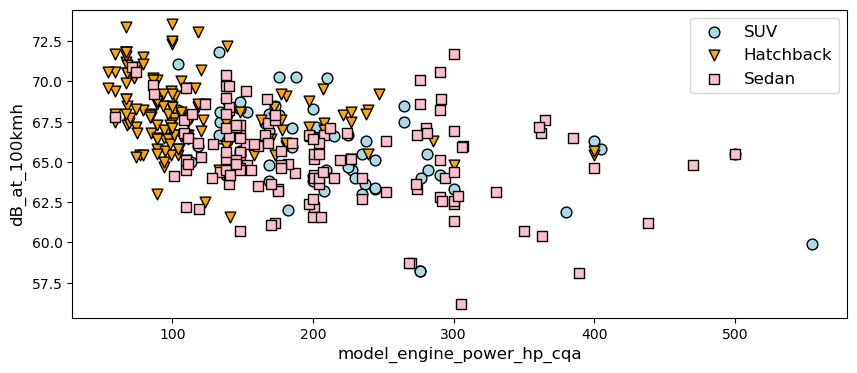

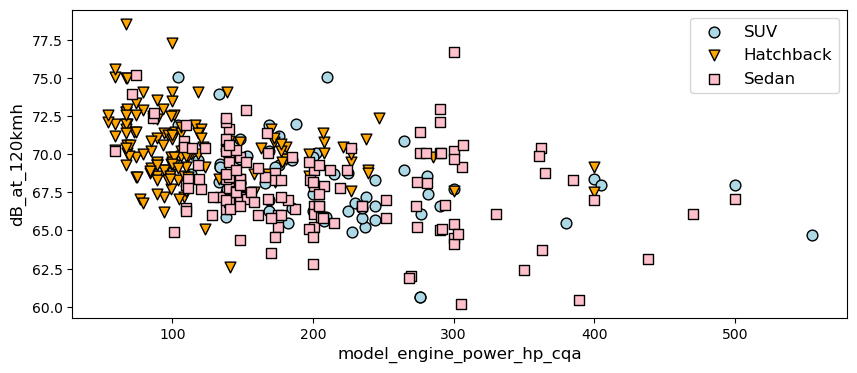

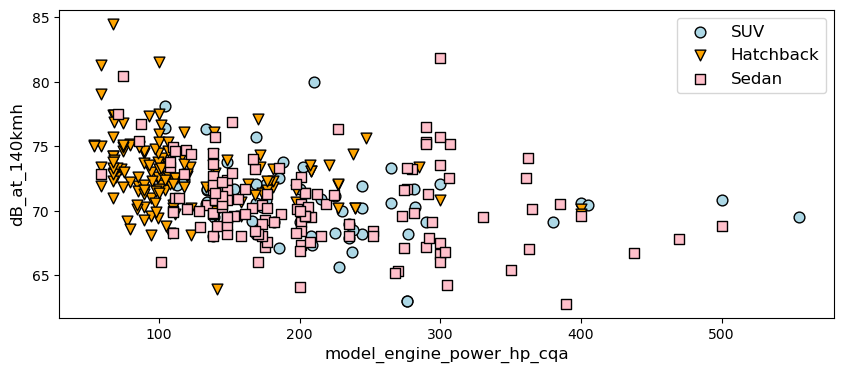

In [116]:
##b='model_weight_lbs_cqa'
b = 'model_engine_power_hp_cqa'
##b = 'model_mpg_city_cqa'
##b = 'model_engine_torque_lbft_cqa'
##b='model_width_mm_cqa'
##b = 'model_height_mm_cqa'

comp = df1[['dB_at_idle',
            'dB_at_50kmh',
            'dB_at_80kmh',
            'dB_at_100kmh',
            'dB_at_120kmh',
            'dB_at_140kmh',
            'Change_idle_to_80kmh',
            'model_engine_position_cqa_cleaned',
            'model_seats_cqa',
            'model_engine_type_cqa_cleaned',
            'model_transmission_type_cqa',
            'model_body_cqa_cleaned',
            'model_drive_cqa_cleaned',
            b]].copy()
comp = comp.dropna()
## Eliminating Engine Locations
comp = comp.drop(comp[(comp.model_engine_position_cqa_cleaned=='Rear')|(comp.model_engine_position_cqa_cleaned=='Middle')].index)
## Eliminating Engine Types
for x in ['boxer','Flat','W','Not Available','electric','single']:
    comp = comp.drop(comp[(comp.model_engine_type_cqa_cleaned==x)].index)
## Eliminating Transmission Types
for x in ['6-speed automatic', '5-speed shiftable automatic', 'CVT', 'Automated Manual',
       '8-speed shiftable automatic', '6-speed manual',
       '6-speed shiftable automatic', '7-speed automated manual',
       '6-speed automatic ', '5-speed manual', 'Single Speed',
       'Direct Drive', '5-speed automatic', '6-speed manual ',
       '8-speed automatic', '4-speed automatic',
       '7-speed shiftable automatic', '6-speed automated manual',
       '7-speed manual', 'automatic', '7-speed automatic ']:
    comp = comp.drop(comp[(comp.model_transmission_type_cqa==x)].index)
## Eliminating Seat Numbers
comp = comp.drop(comp[(comp.model_seats_cqa>5)|(comp.model_seats_cqa<4)].index)
## Eliminating Unknown Drive types
comp = comp.drop(comp[comp.model_drive_cqa_cleaned=='Not Available'].index)
print(comp.shape)

for a in ['dB_at_idle','Change_idle_to_80kmh','dB_at_50kmh','dB_at_80kmh','dB_at_100kmh','dB_at_120kmh','dB_at_140kmh']:
    plt.figure(figsize=(10,4))
    plt.scatter(comp[b].loc[comp.model_body_cqa_cleaned=='SUV'],
               comp[a].loc[comp.model_body_cqa_cleaned=='SUV'],
               label="SUV",
               s=60,
               edgecolor='black',
               c='lightblue')
    plt.scatter(comp[b].loc[comp.model_body_cqa_cleaned=='Hatchback'],
               comp[a].loc[comp.model_body_cqa_cleaned=='Hatchback'],
               label='Hatchback',
               marker='v',
               s=60,
               edgecolor='black',
               c='orange')
    plt.scatter(comp[b].loc[comp.model_body_cqa_cleaned=='Sedan'],
               comp[a].loc[comp.model_body_cqa_cleaned=='Sedan'],
               label='Sedan',
               marker='s',
               s=60,
               edgecolor='black',
               c='pink')
    plt.ylabel(a,fontsize = 12)
    plt.xlabel(b,fontsize = 12)
    plt.legend(fontsize=12)
    
    plt.show()

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


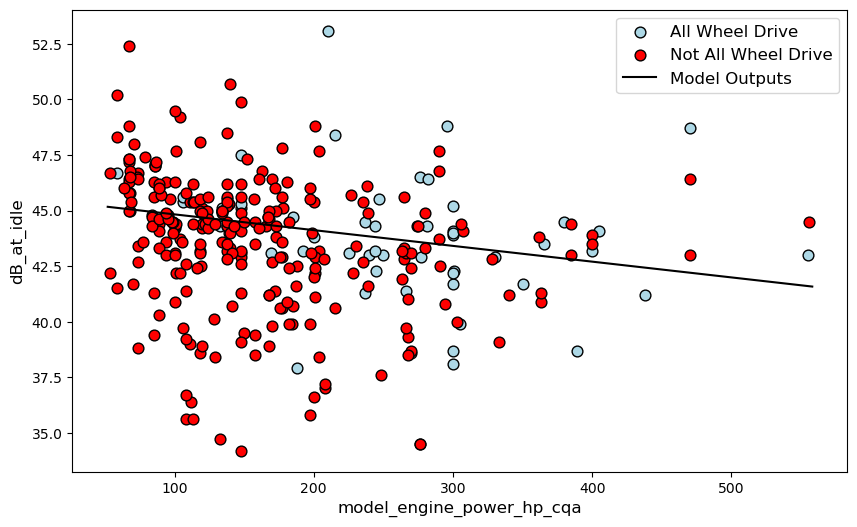

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


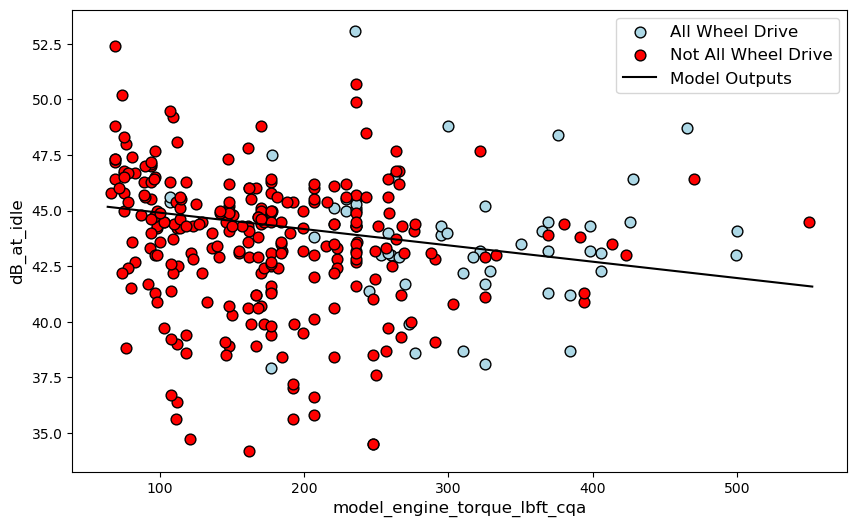

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


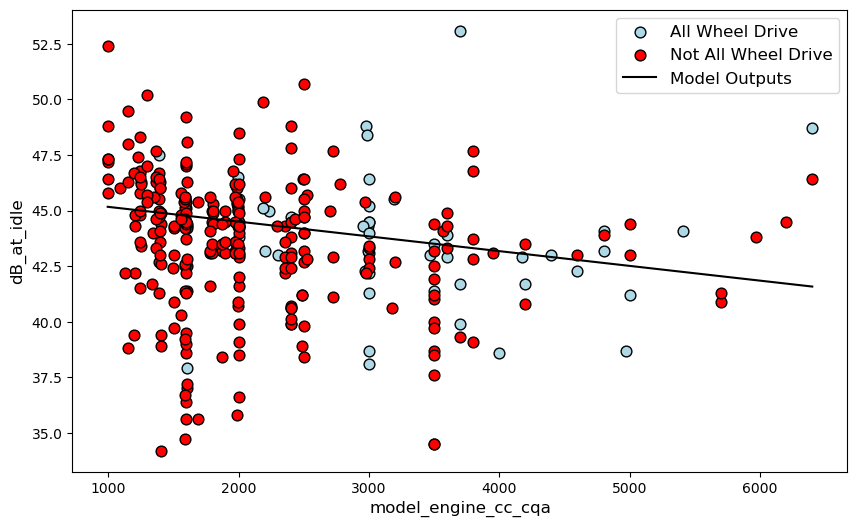

C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


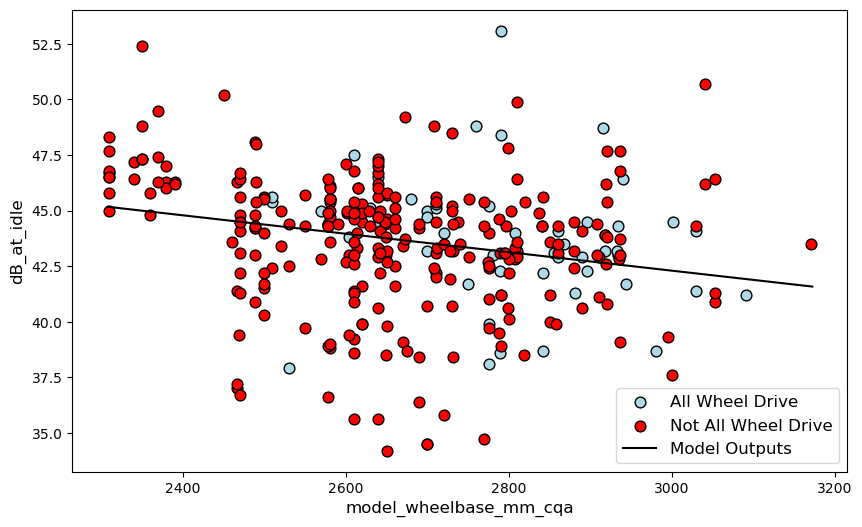

In [121]:
reg1 = LinearRegression(copy_X = True)

reg1.fit(df_train[['model_engine_power_hp_cqa', 'model_engine_torque_lbft_cqa', 'model_engine_cc_cqa', 'model_wheelbase_mm_cqa']],
         df_train['dB_at_idle'])
i=0
for a in ['model_engine_power_hp_cqa', 'model_engine_torque_lbft_cqa', 'model_engine_cc_cqa', 'model_wheelbase_mm_cqa']:
    plt.figure(figsize=(10,6))
    plt.scatter(df_train[a].loc[df_train['All Wheel Drive']==1],
               df_train['dB_at_idle'].loc[df_train['All Wheel Drive']==1],
               label='All Wheel Drive',
               s = 60,
               edgecolor='black',
               c='lightblue')
    plt.scatter(df_train[a].loc[df_train['All Wheel Drive']==0],
               df_train['dB_at_idle'].loc[df_train['All Wheel Drive']==0],
               label='Not All Wheel Drive',
               s = 60,
               edgecolor='black',
               c='red')
    xs_base = np.zeros((1000,4))
    xs_base[:,0] = np.linspace(df_train.model_engine_power_hp_cqa.min()-2,
                                  df_train.model_engine_power_hp_cqa.max()+2,
                                  1000)
    xs_base[:,1] = np.linspace(df_train.model_engine_torque_lbft_cqa.min()-2,
                                  df_train.model_engine_torque_lbft_cqa.max()+2,
                                  1000)
    xs_base[:,2] = np.linspace(df_train.model_engine_cc_cqa.min()-2,
                                  df_train.model_engine_cc_cqa.max()+2,
                                  1000)
    xs_base[:,3] = np.linspace(df_train.model_wheelbase_mm_cqa.min()-2,
                                  df_train.model_wheelbase_mm_cqa.max()+2,
                                  1000)
    ys = reg1.predict(xs_base)
    plt.plot(xs_base[:,i],ys,
            '-',
            c='black',
            linewidth = 1.5,
            label = "Model Outputs")
    plt.ylabel('dB_at_idle',fontsize = 12)
    plt.xlabel(a,fontsize = 12)
    plt.legend(fontsize=12)
    i+=1
    plt.show()

Distribution graphs (histogram/bar graph) of sampled columns:

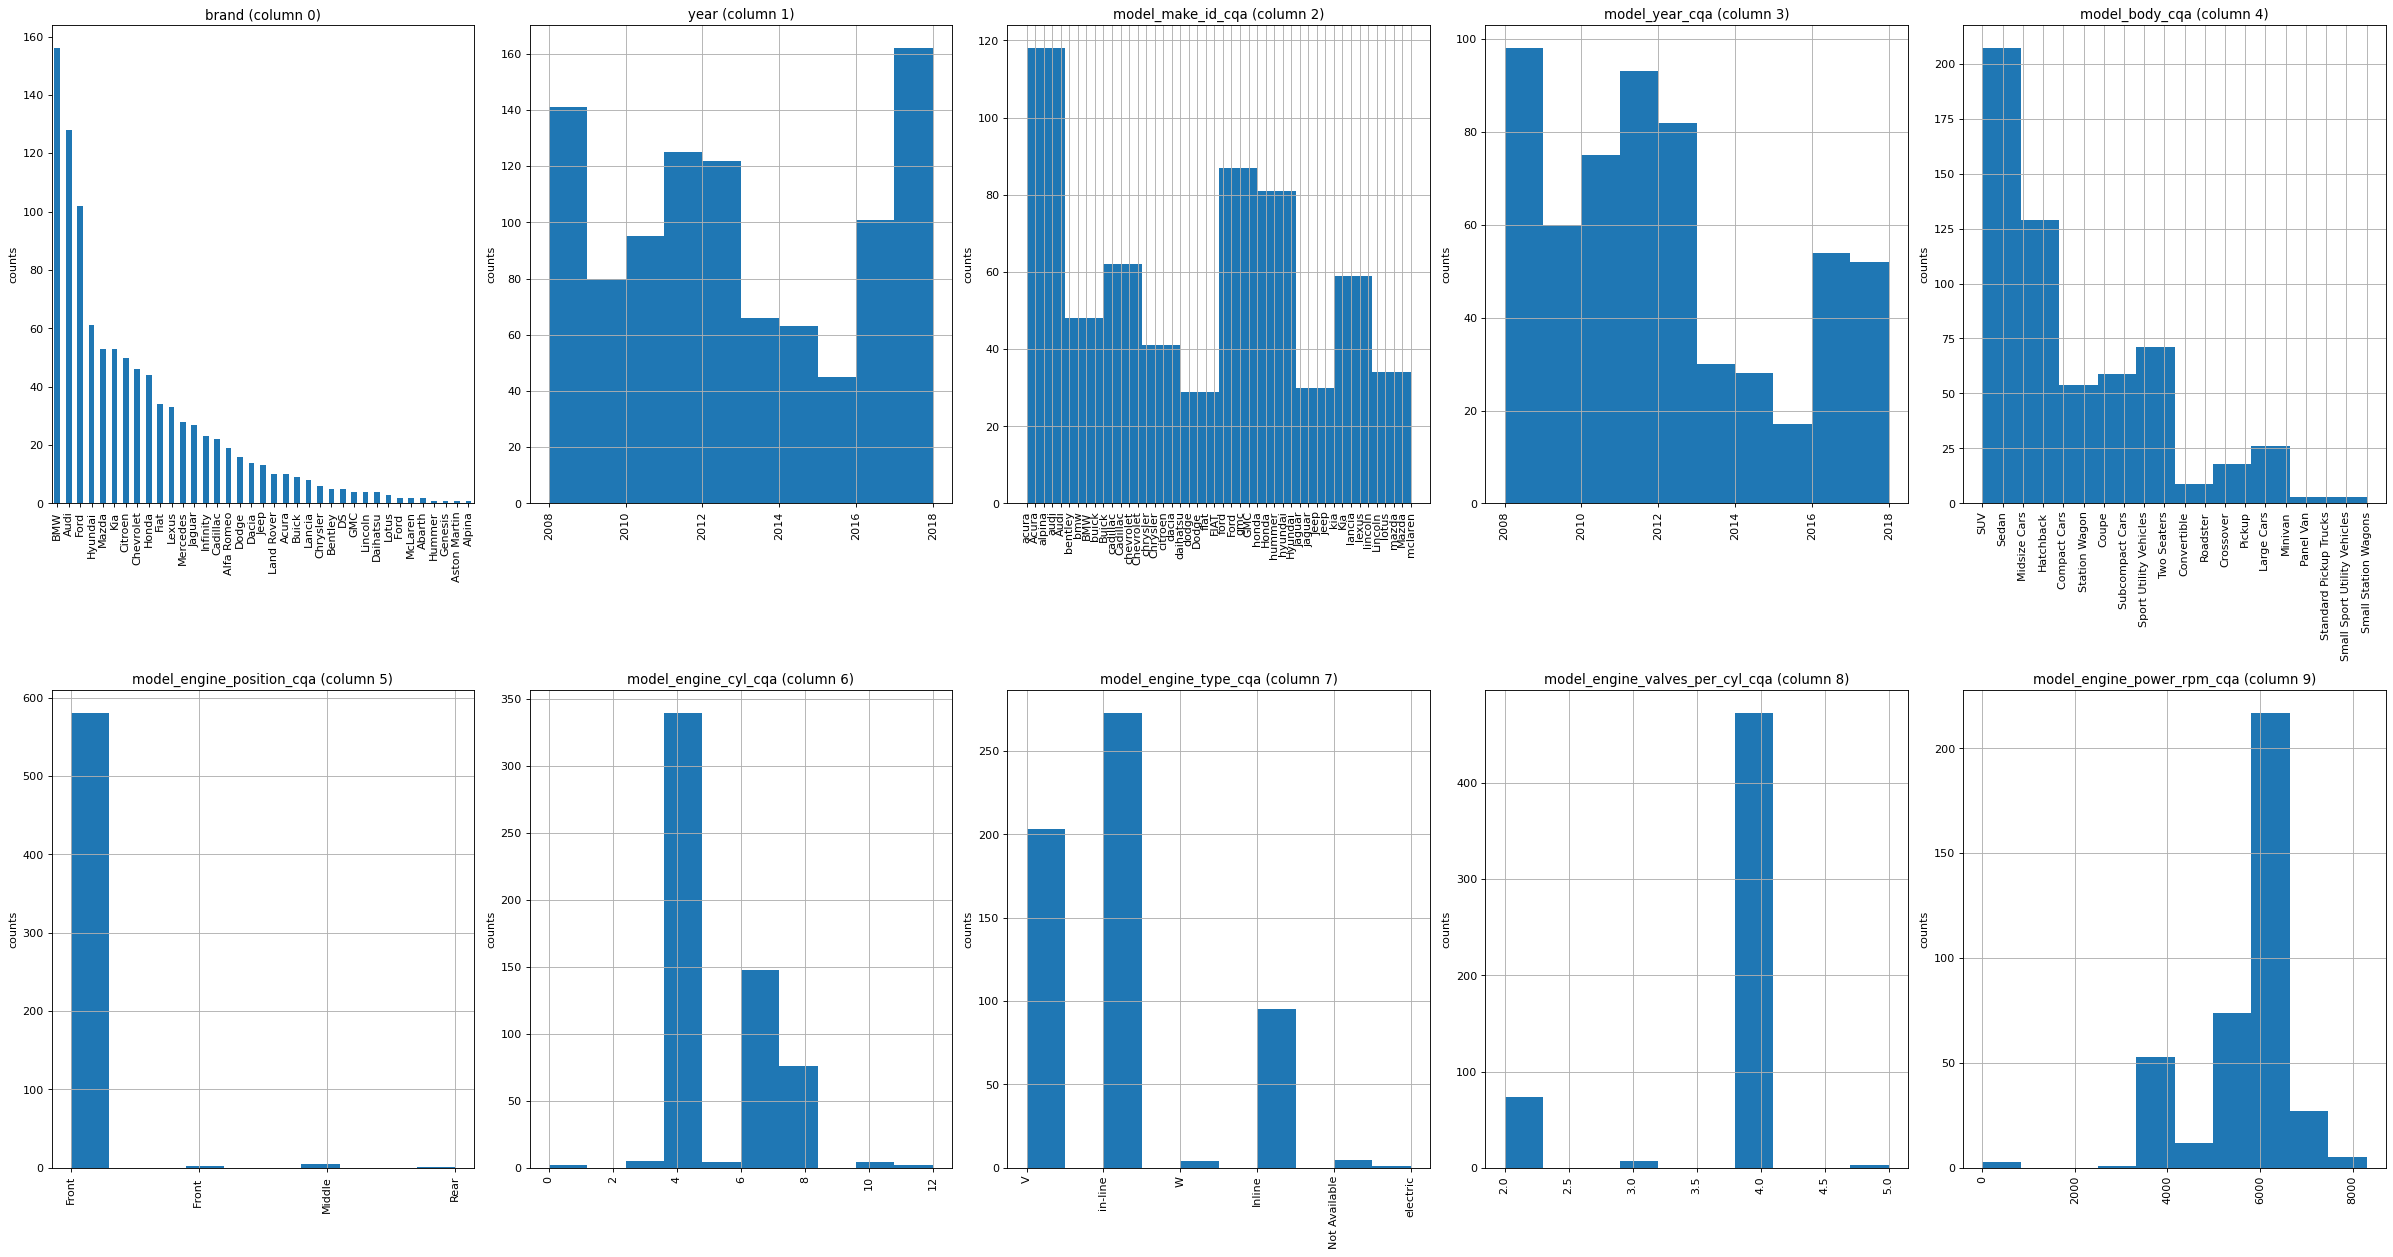

In [14]:
plotPerColumnDistribution(df1, 10, 5)

Correlation matrix:

C:\Users\User\AppData\Local\Temp\ipykernel_13820\128494285.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN
C:\Users\User\AppData\Local\Temp\ipykernel_13820\128494285.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


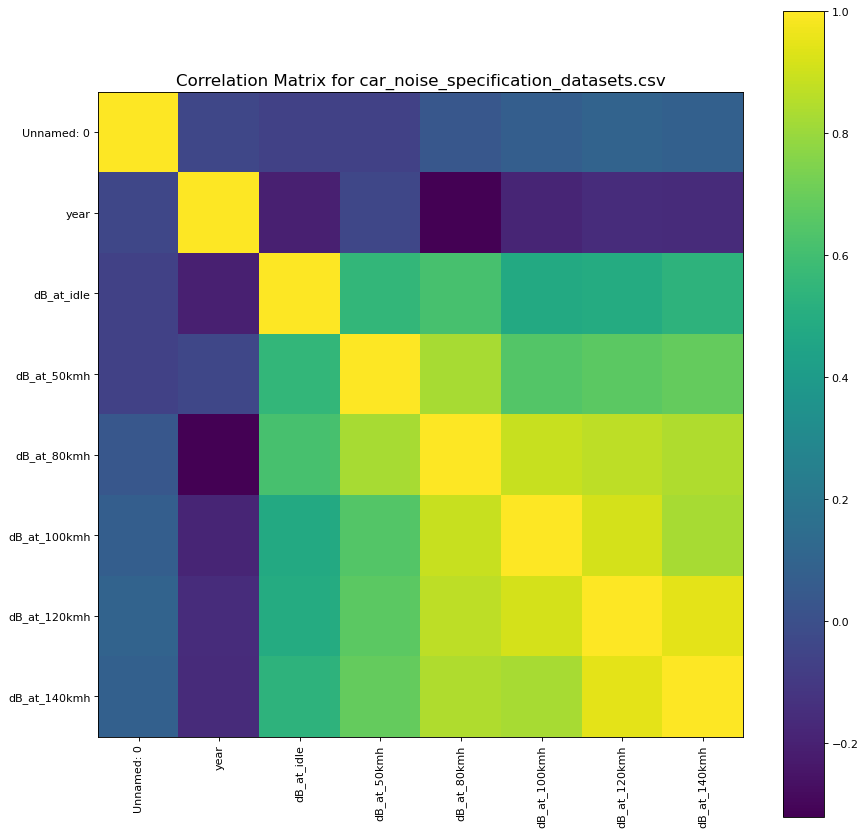

In [15]:
plotCorrelationMatrix(df1, 13)

Scatter and density plots:

C:\Users\User\AppData\Local\Temp\ipykernel_13820\950191735.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


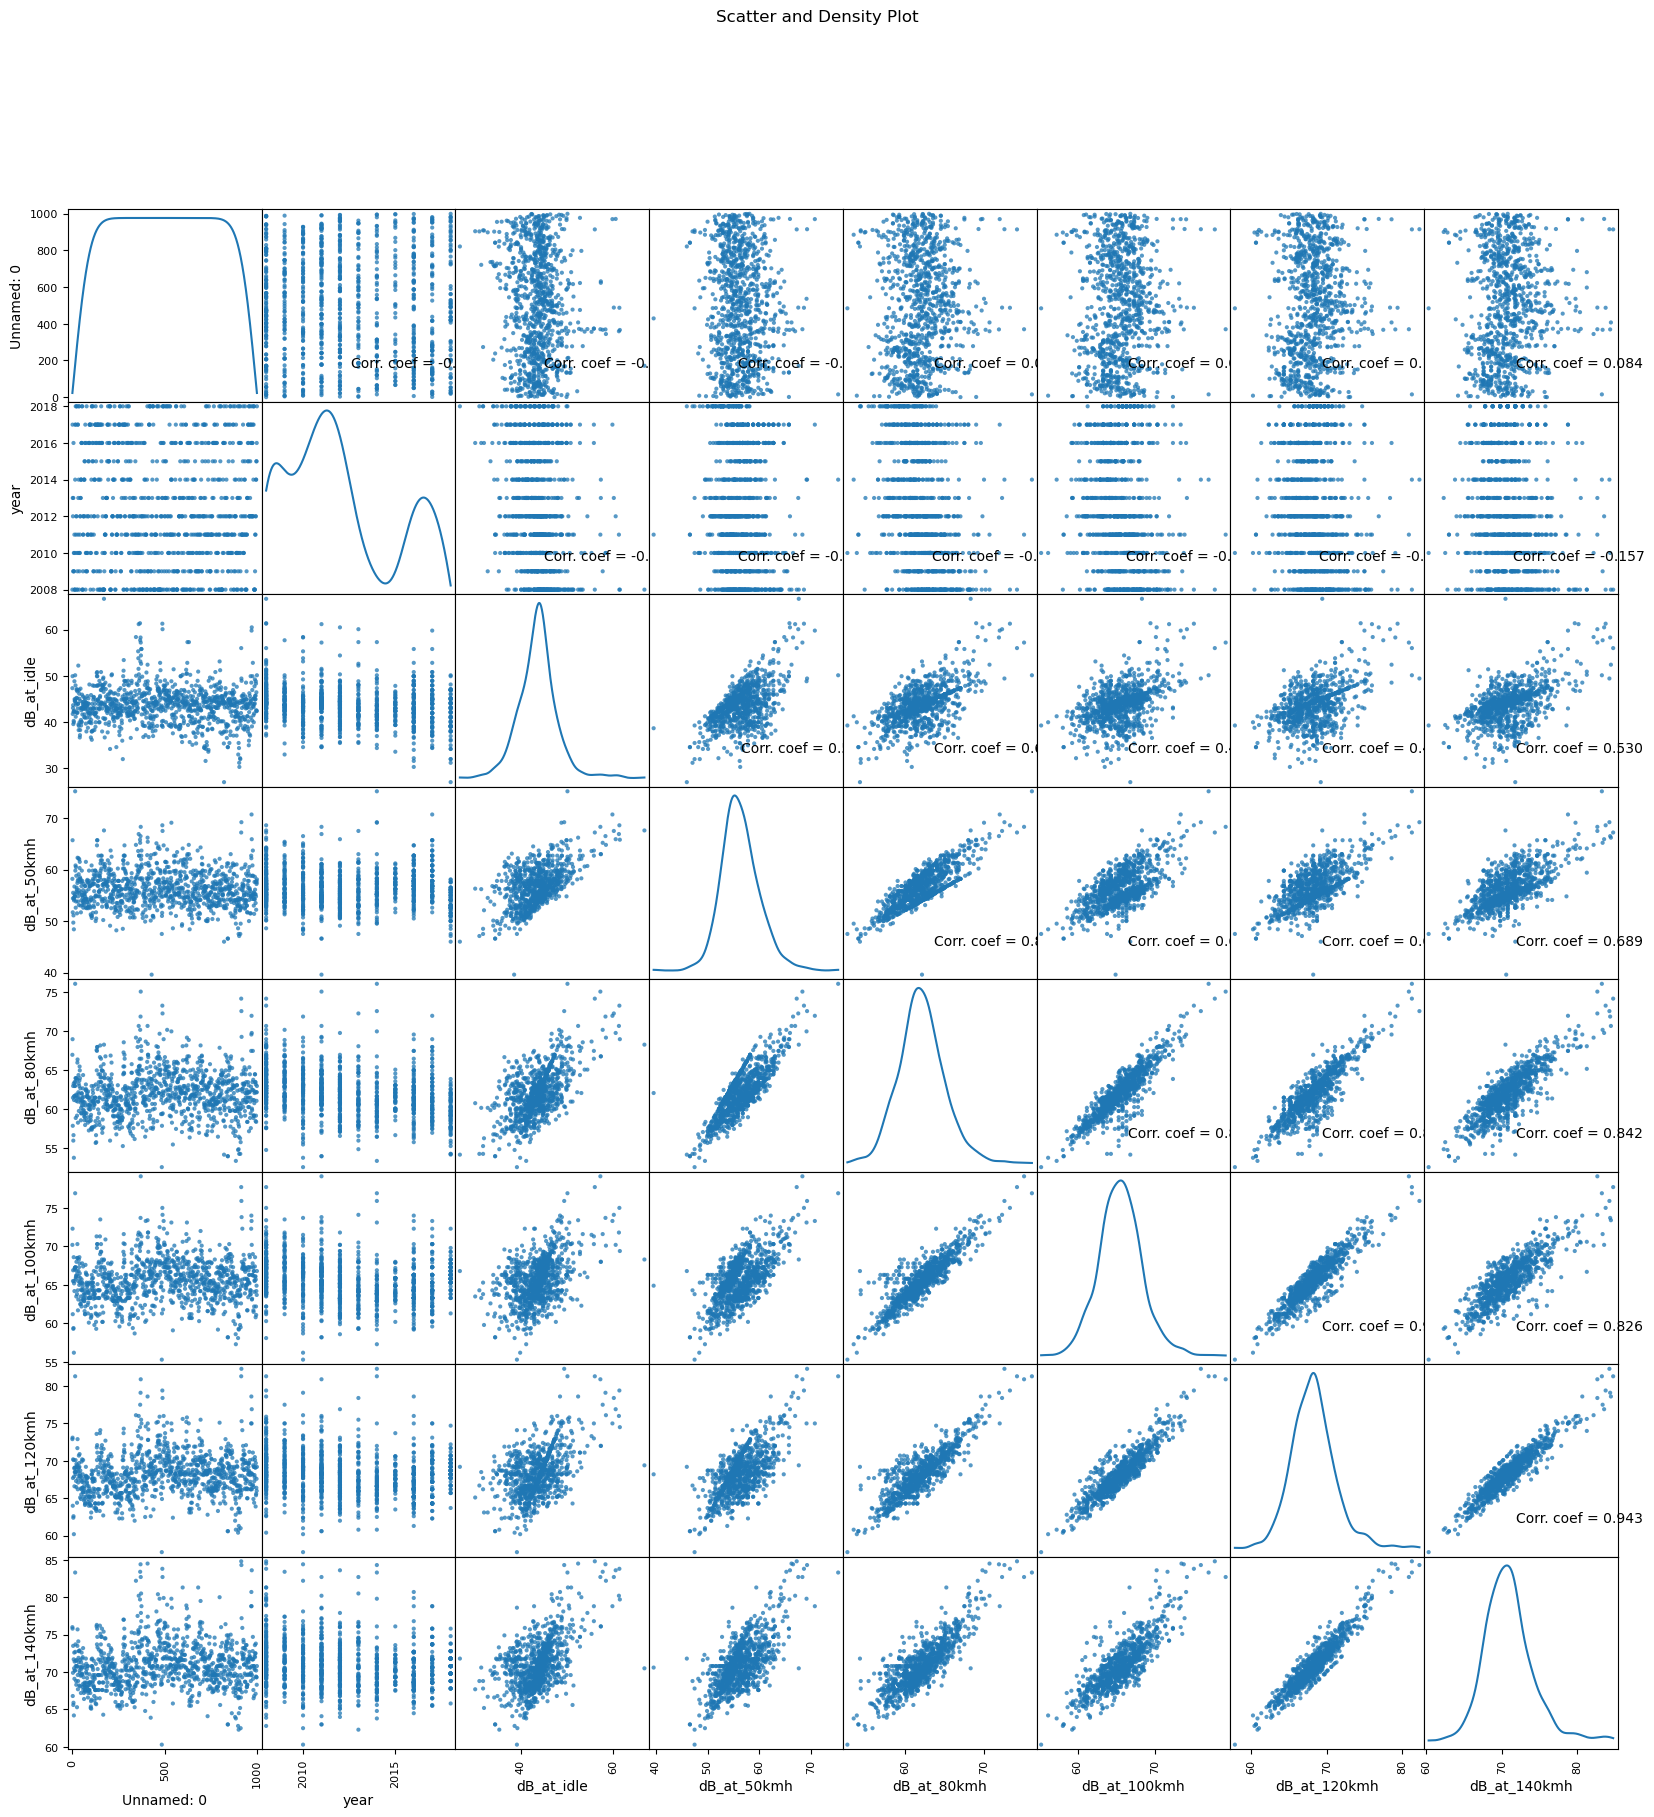

In [16]:
plotScatterMatrix(df1, 20, 10)

## Conclusion
This concludes your starter analysis! To go forward from here, click the blue "Fork Notebook" button at the top of this kernel. This will create a copy of the code and environment for you to edit. Delete, modify, and add code as you please. Happy Kaggling!

In [5]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [13]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


In [6]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
